<a href="https://colab.research.google.com/github/ovieimara/ITNPBD4/blob/master/ITNPBD4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor  # For regression
from sklearn.tree import DecisionTreeClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
#read csv file
hotel_bookings = "hotel_bookings.csv"
# H2 = "H2.csv"
# H1 = "H1.csv"

In [3]:
hotel_booking_df = pd.read_csv(hotel_bookings)
# H1_df = pd.read_csv(H1)
# H2_df = pd.read_csv(H2)


In [4]:
display(hotel_booking_df.head())
# display(H1_df.head())
# display(H2_df.head())

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [5]:
# H1_df.info()
# H2_df.info()

In [6]:
hotel_booking_df.describe()
# H1_df.describe()
# H2_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
hotel_booking_df.isna().sum()
hotel_booking_df.isna().sum()
# H2_df['Country'].isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

Fill NaNs with 0

In [8]:
hotel_booking_df['agent'] = hotel_booking_df['agent'].fillna(0)
hotel_booking_df['children'] = hotel_booking_df['children'].fillna(0)
hotel_booking_df['company'] = hotel_booking_df['company'].fillna(0)
hotel_booking_df['country'] = hotel_booking_df['country'].fillna('Unknown')

In [9]:
#density plots
# hotel_booking_df['market_segment'].value_counts()
# sns.displot(hotel_booking_df['market_segment'])
# plt.xticks(rotation=90)
# sns..boxplot(hotel_booking_df['market_segment'])
#create box plot, displot, violin plot and histogram plots in a figure

def create_plots(df, col):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    sns.boxplot(df[col], ax=ax[0, 0])
    sns.violinplot(df[col], ax=ax[0, 1])
    sns.countplot(df[col], ax=ax[1, 0], order=df[col].value_counts().index)
    sns.histplot(df[col], ax=ax[1, 1], bins="auto", kde=True)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()




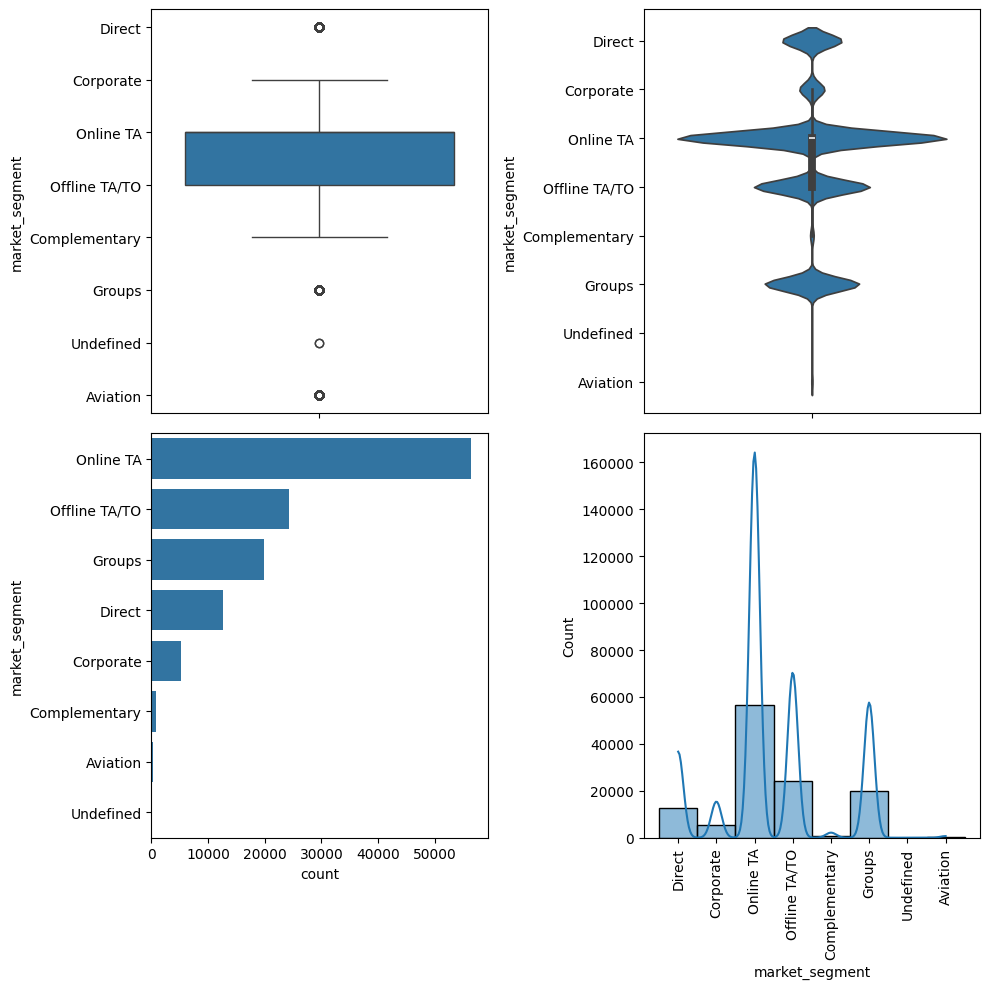

In [10]:
column = "market_segment"
create_plots(hotel_booking_df, column)


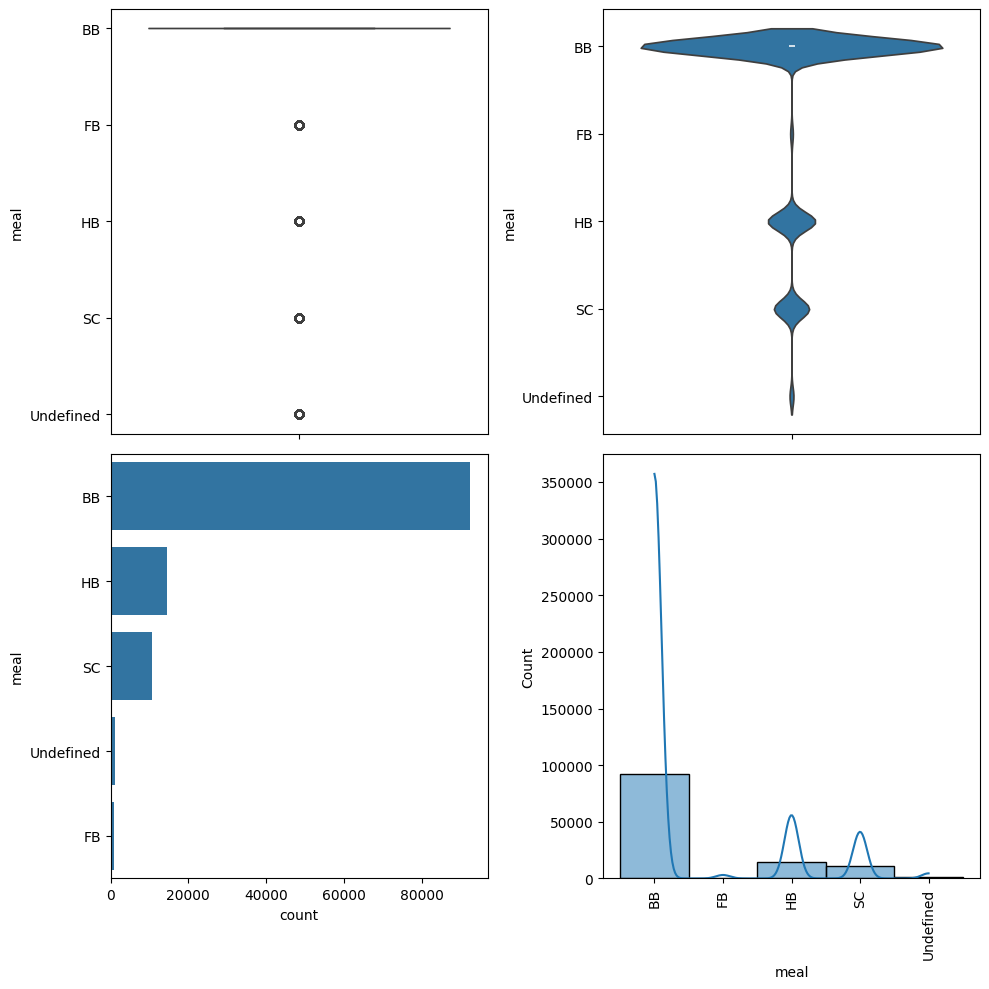

In [11]:
column = "meal"
create_plots(hotel_booking_df, column)

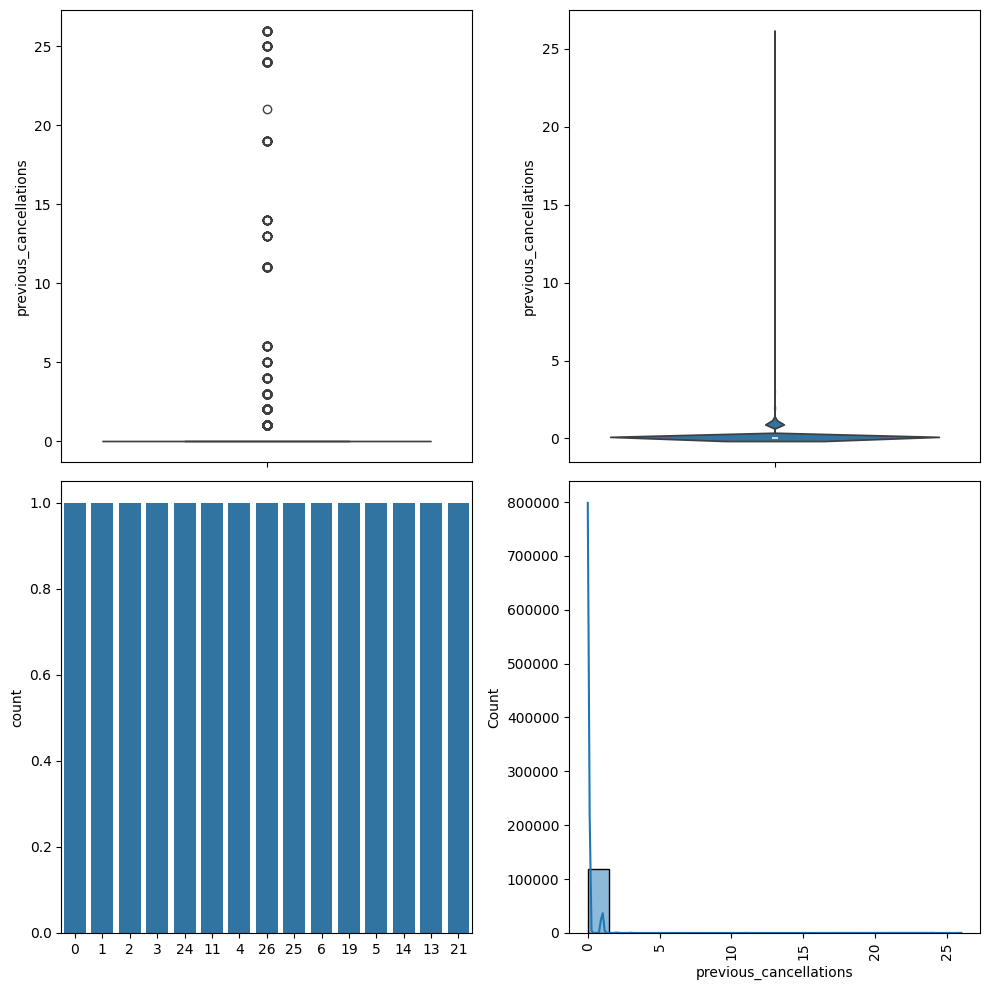

In [12]:
column = "previous_cancellations"
create_plots(hotel_booking_df, column)


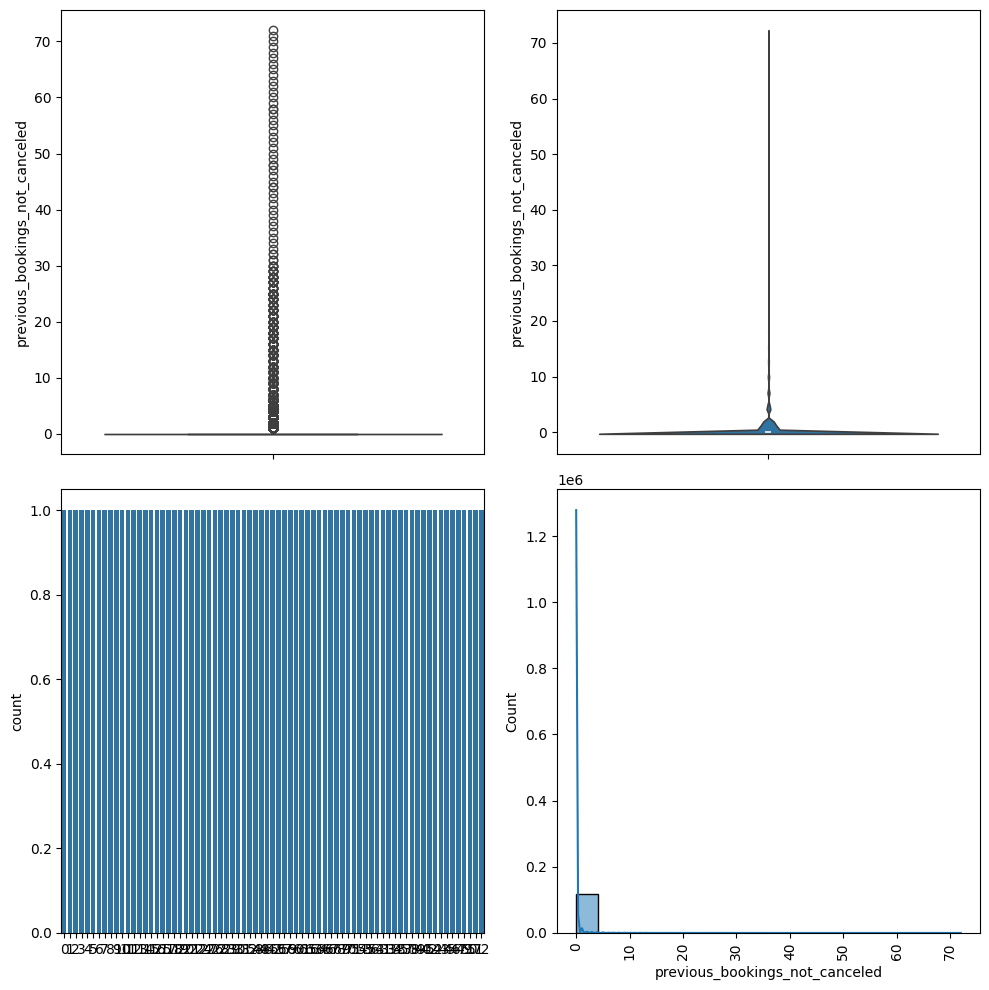

In [13]:
column = "previous_bookings_not_canceled"
create_plots(hotel_booking_df, column)

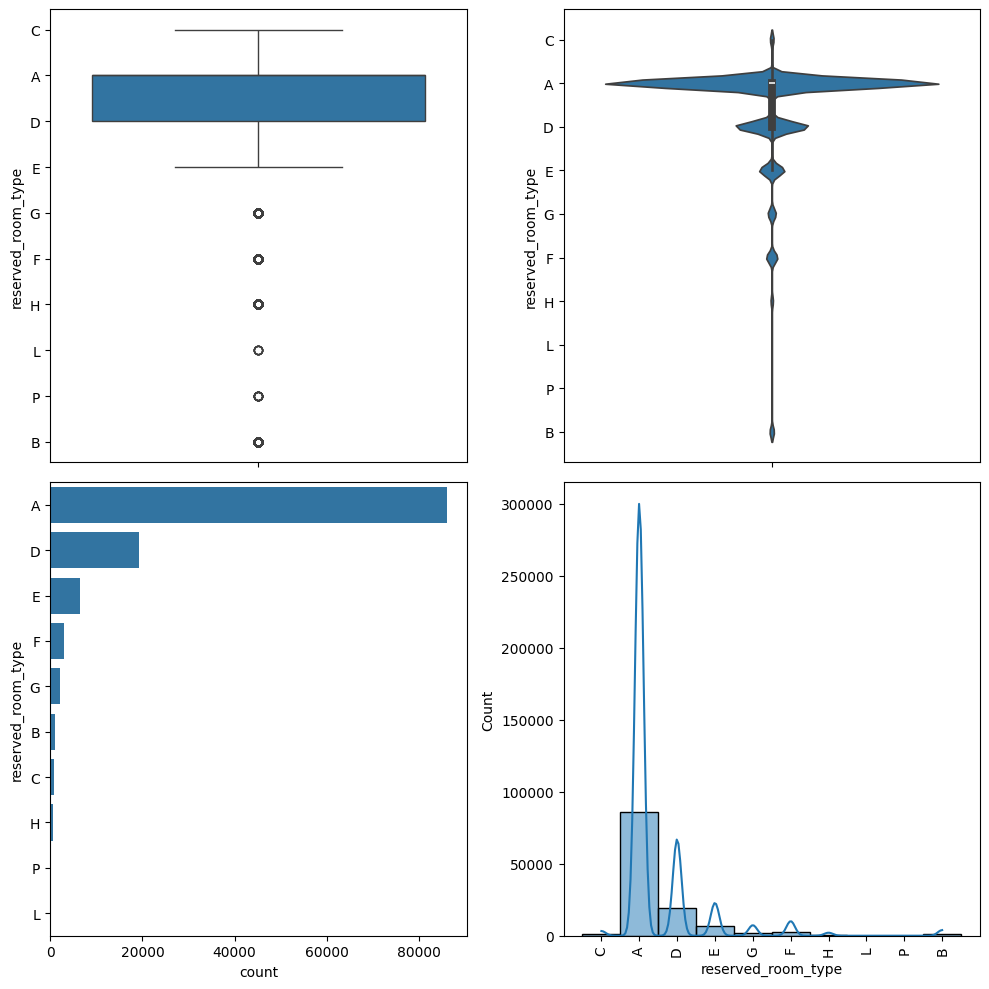

In [14]:
column = "reserved_room_type"
create_plots(hotel_booking_df, column)

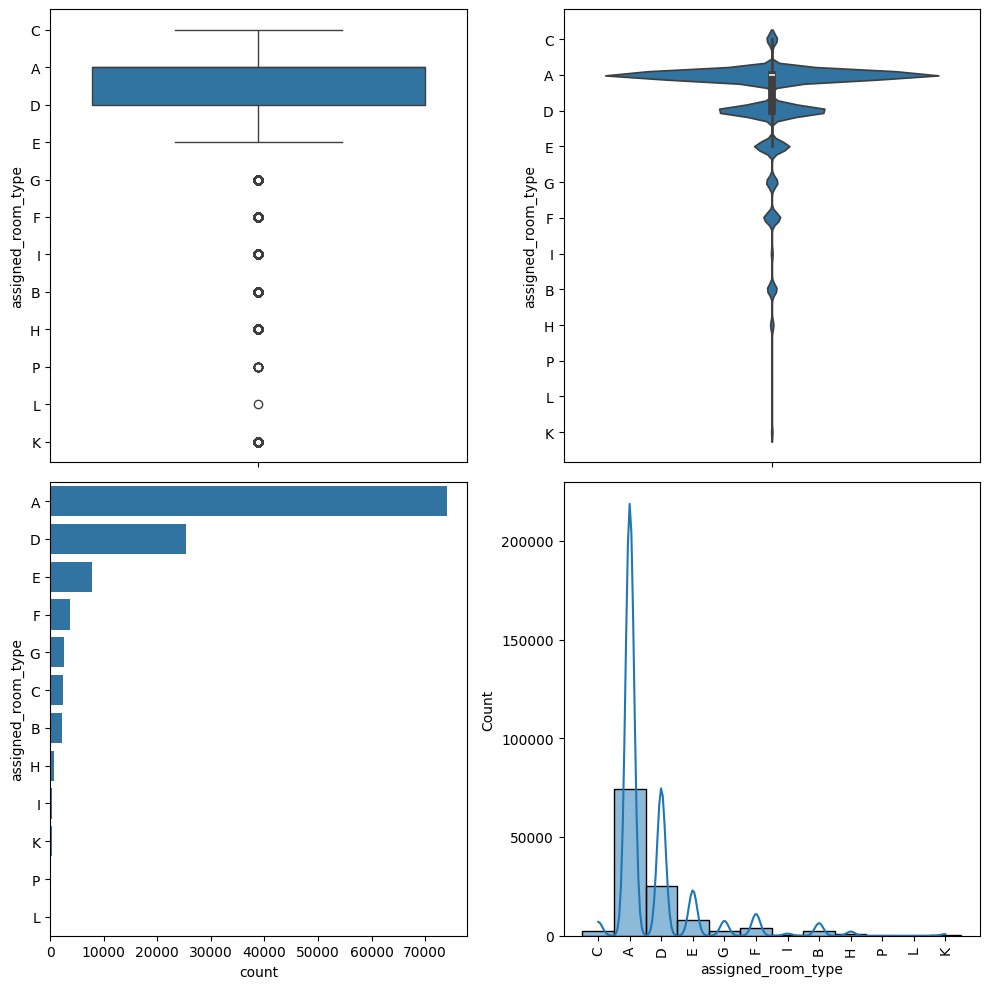

In [15]:
column = "assigned_room_type"
create_plots(hotel_booking_df, column)

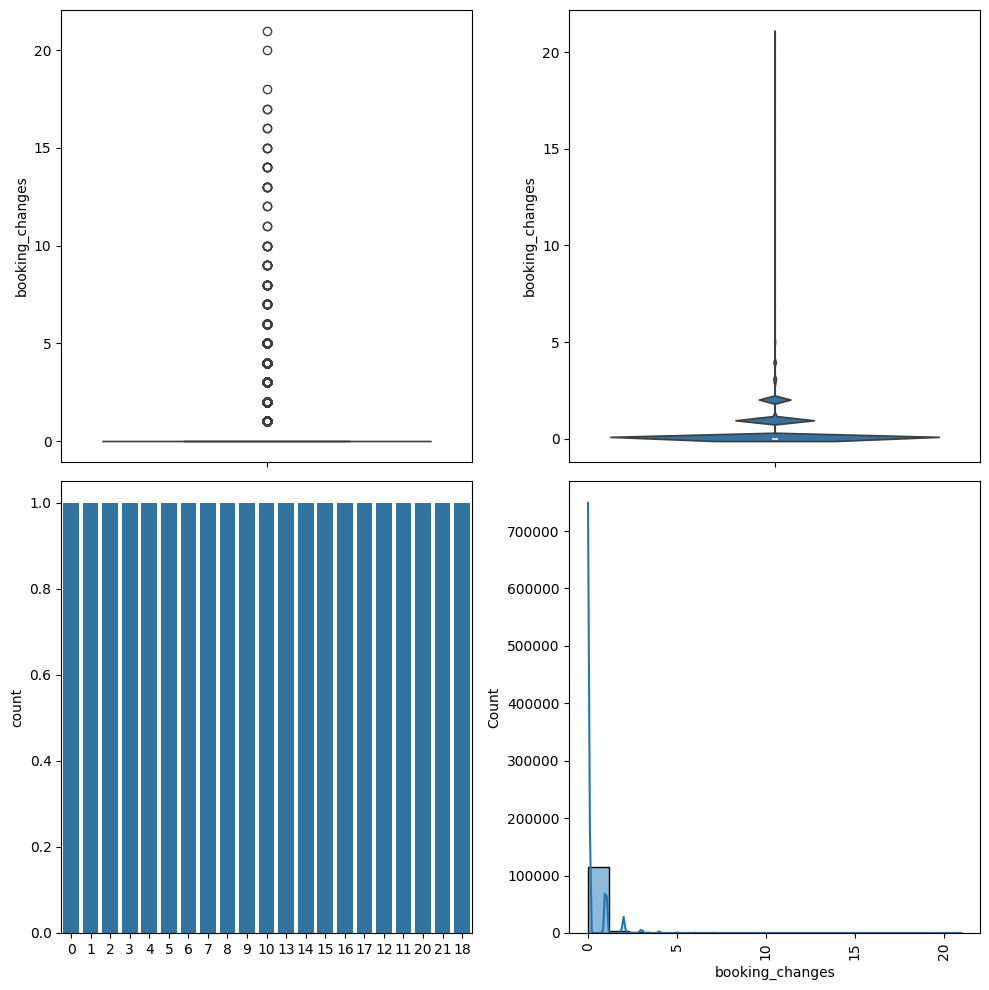

In [16]:
column = "booking_changes"
create_plots(hotel_booking_df, column)

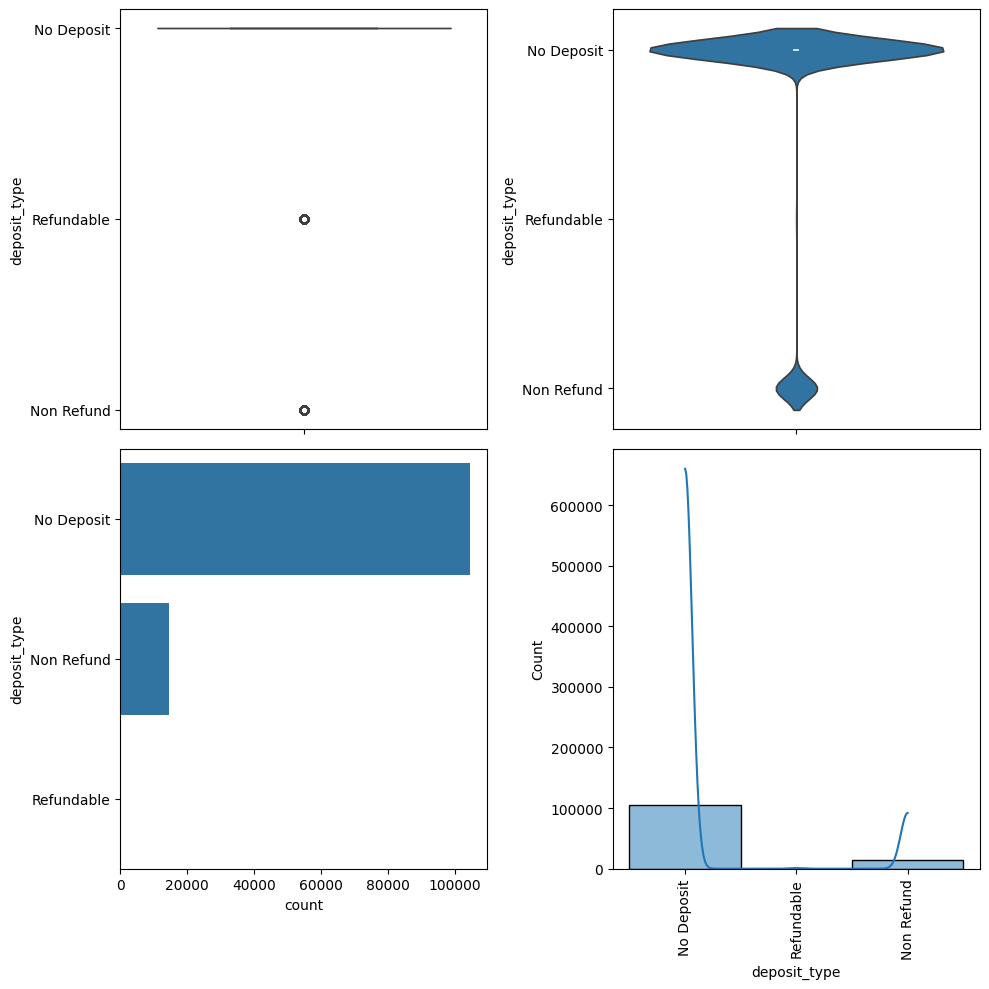

In [17]:
column = "deposit_type"
create_plots(hotel_booking_df, column)

remove NaN's

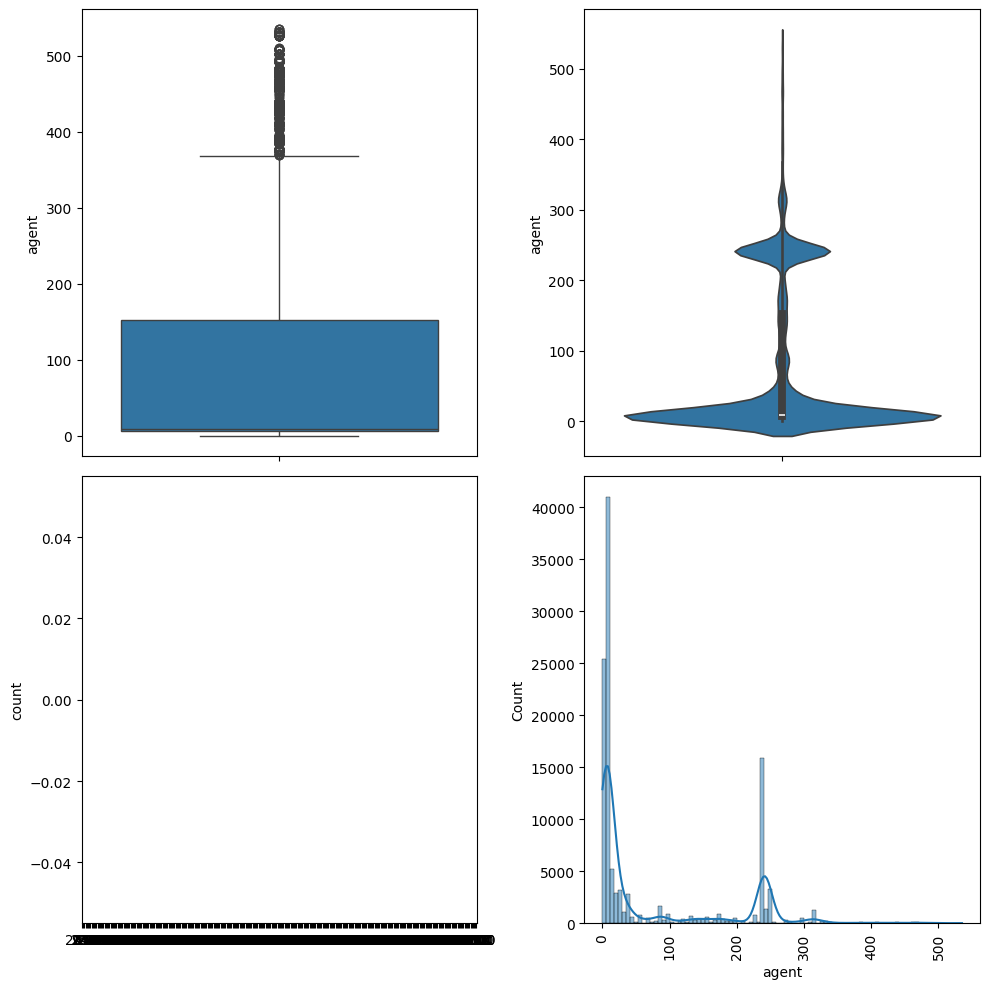

In [18]:
column = "agent"
create_plots(hotel_booking_df, column)


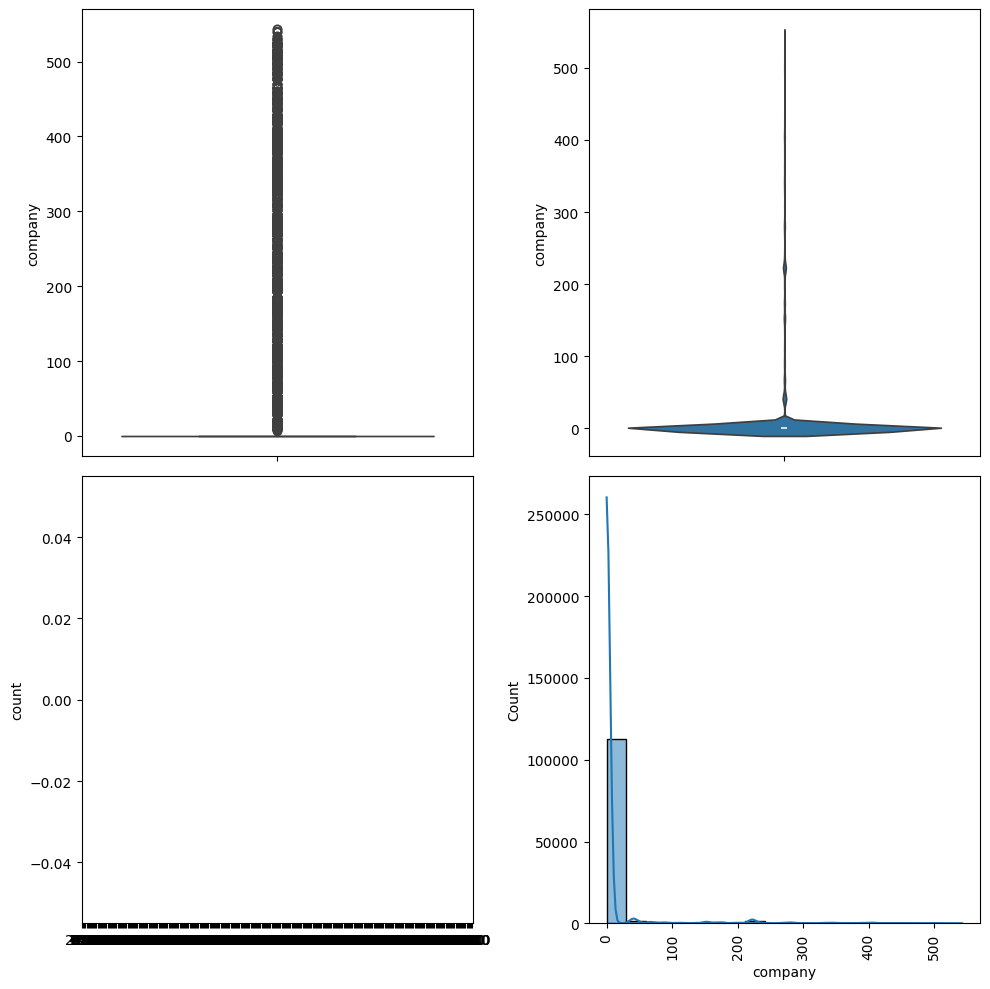

In [19]:
column = "company"
create_plots(hotel_booking_df, column)

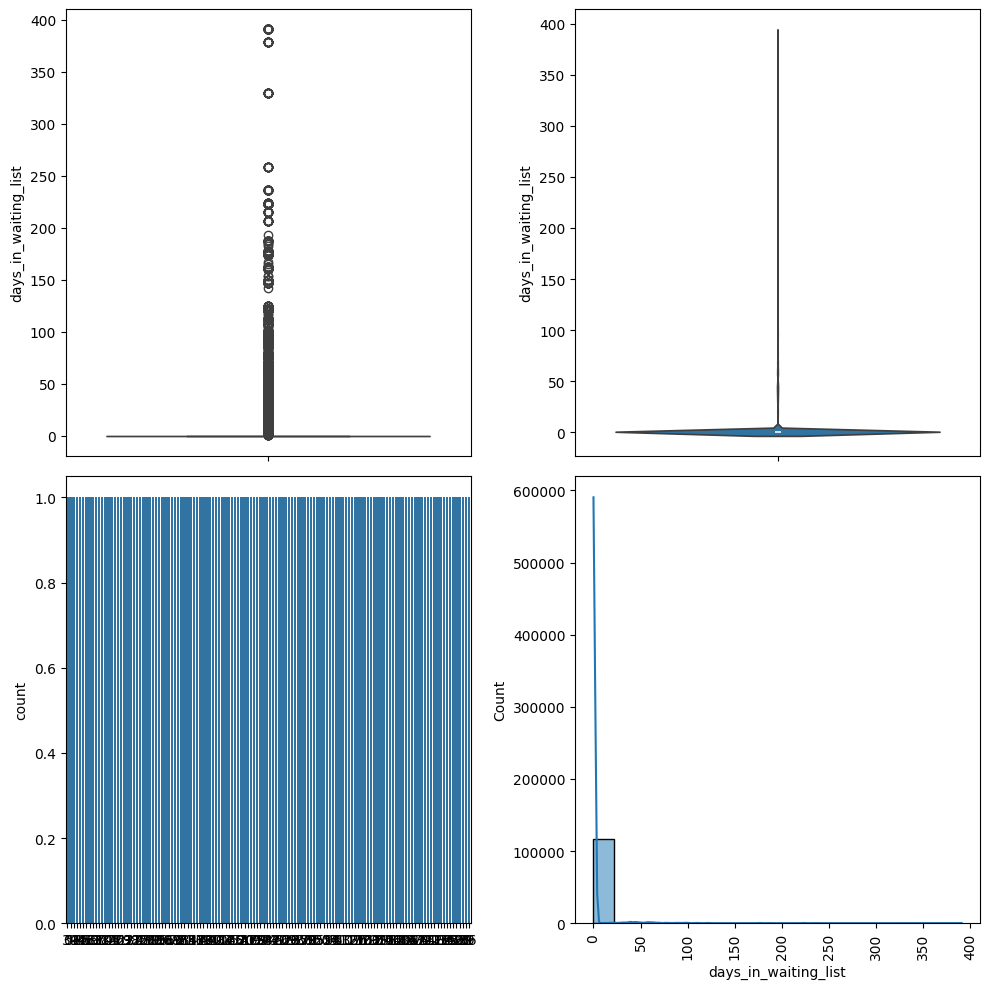

In [20]:
column = "days_in_waiting_list"
# hotel_booking_df['days_in_waiting_list'].isna().sum()
# hotel_booking_df['agent'] = hotel_booking_df['agent'].fillna(0)
create_plots(hotel_booking_df, column)

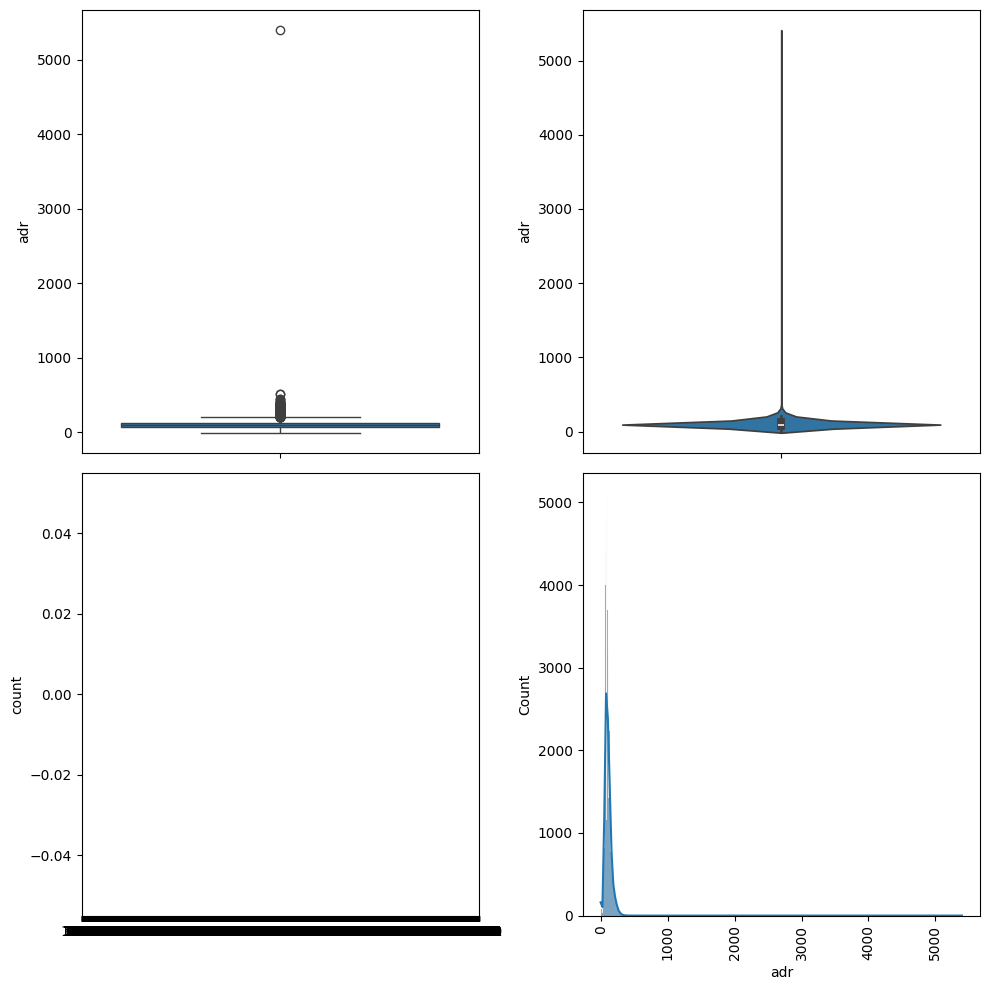

In [21]:
column = "adr"
# hotel_booking_df['adr'].isna().sum()
# hotel_booking_df['adr'] = hotel_booking_df['adr'].fillna(0)
create_plots(hotel_booking_df, column)
# hotel_booking_df['adr'].describe()

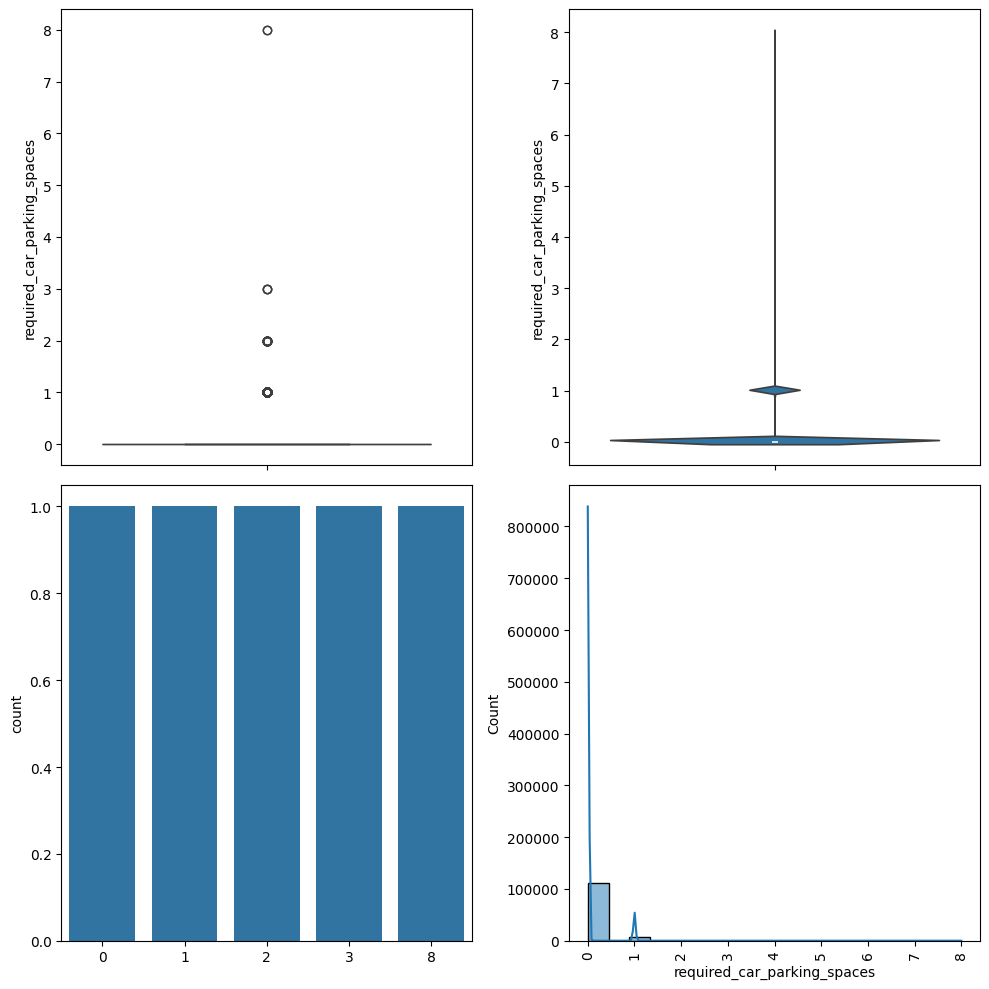

In [22]:
column = "required_car_parking_spaces"
# hotel_booking_df['adr'].isna().sum()
# hotel_booking_df['adr'] = hotel_booking_df['adr'].fillna(0)
create_plots(hotel_booking_df, column)

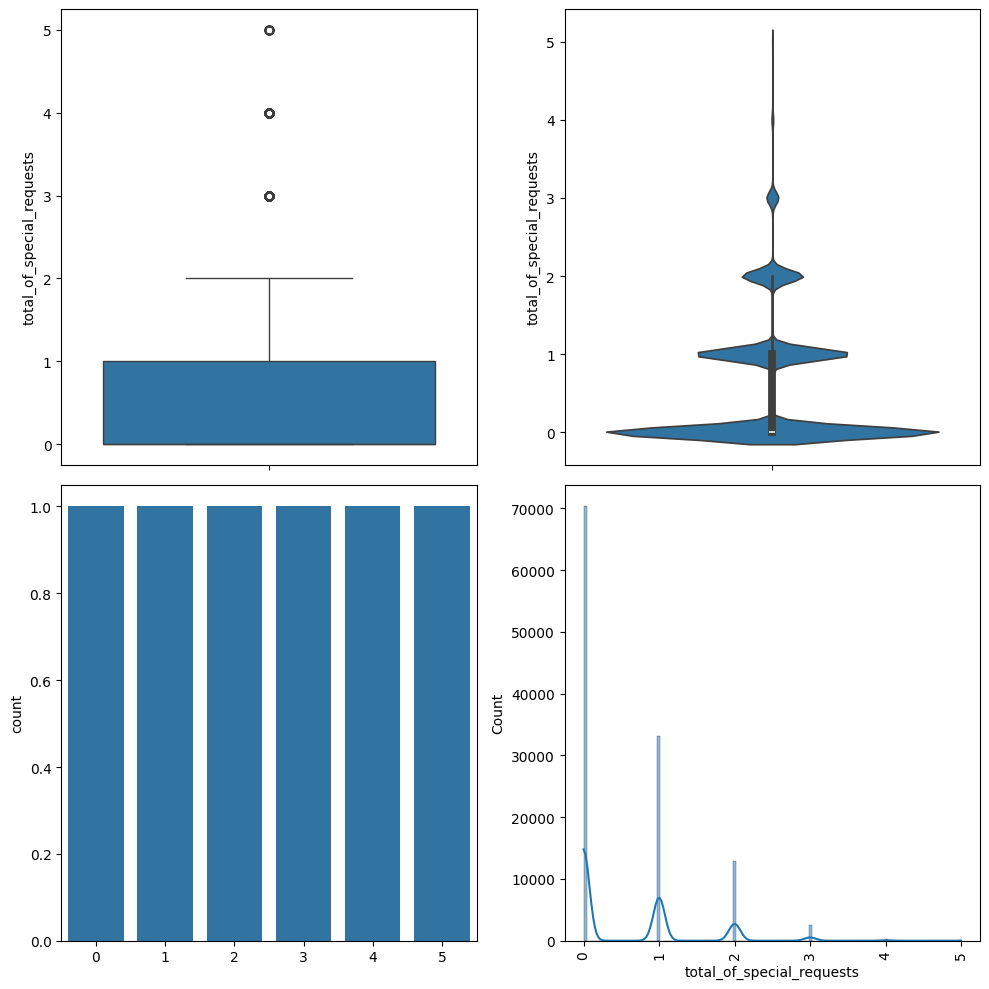

In [23]:
column = "total_of_special_requests"
# hotel_booking_df['adr'].isna().sum()
# hotel_booking_df['adr'] = hotel_booking_df['adr'].fillna(0)
create_plots(hotel_booking_df, column)

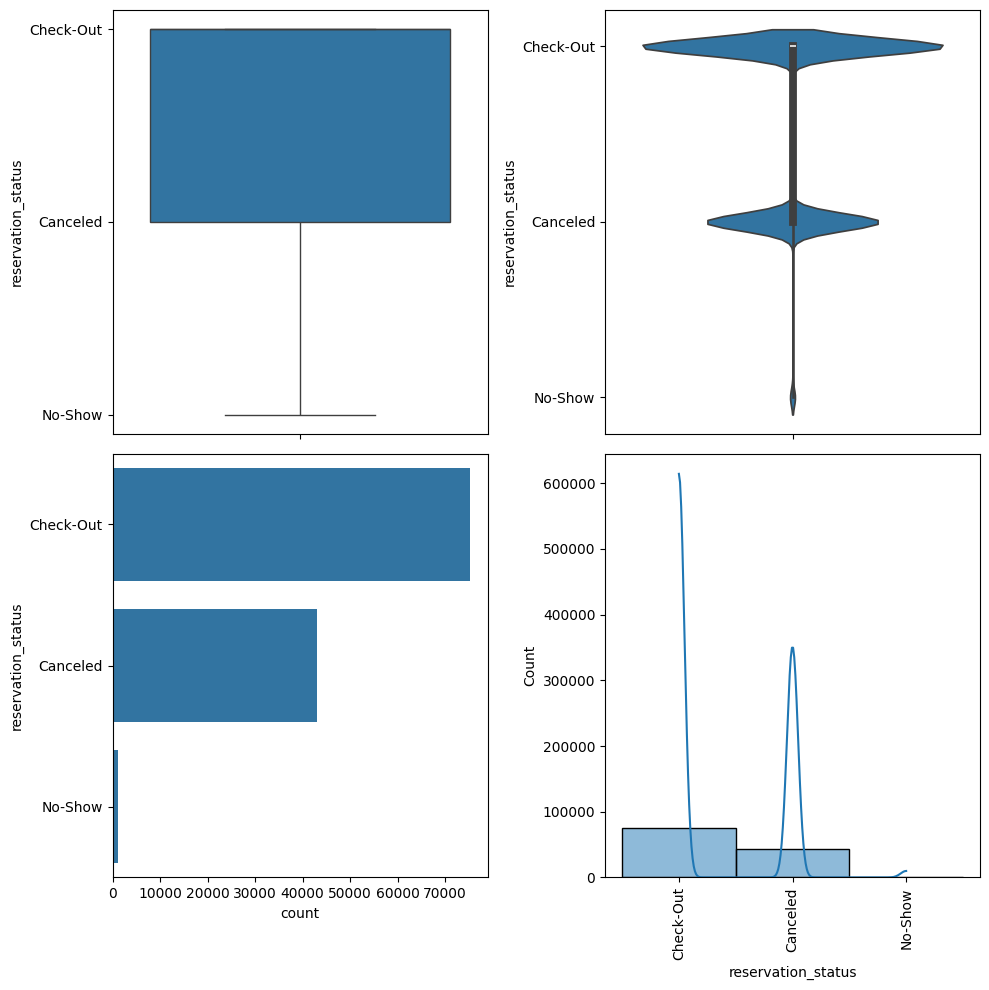

In [24]:
column = "reservation_status"
# hotel_booking_df['adr'].isna().sum()
# hotel_booking_df['adr'] = hotel_booking_df['adr'].fillna(0)
create_plots(hotel_booking_df, column)

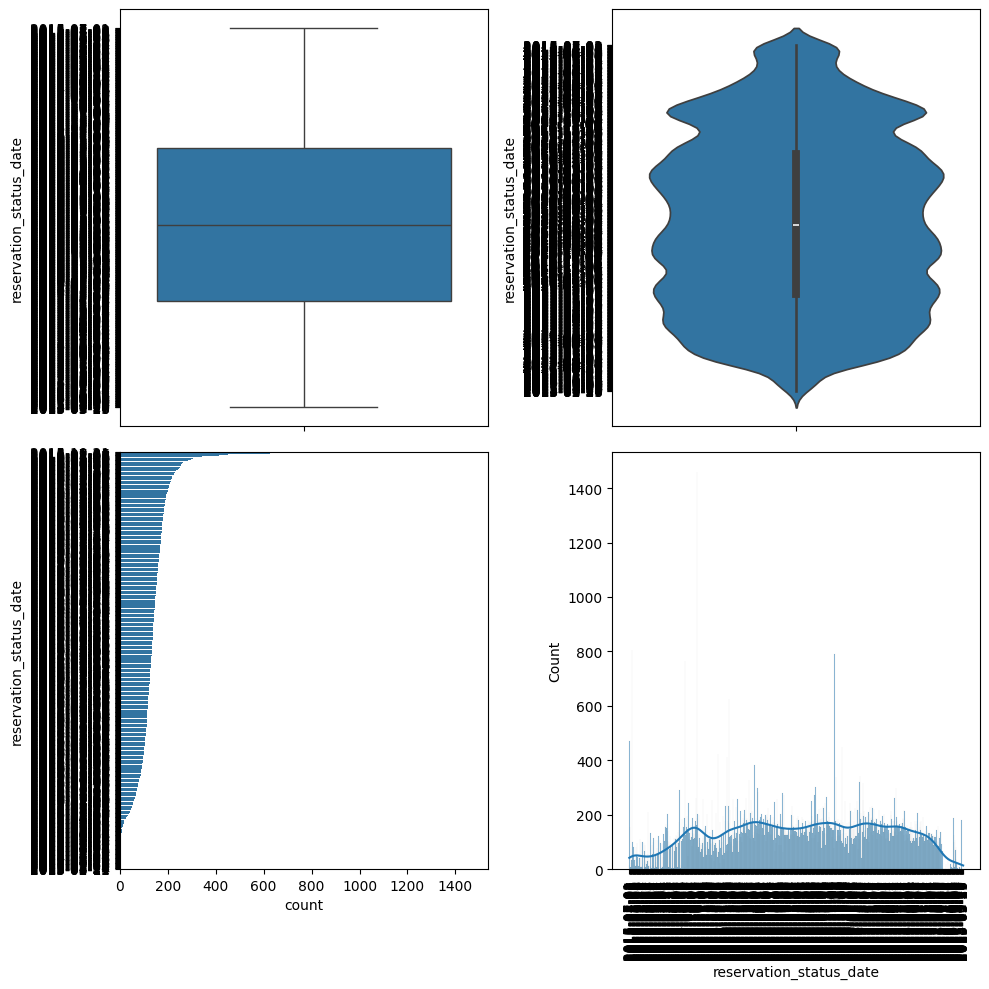

In [25]:
column = "reservation_status_date"
# hotel_booking_df['adr'].isna().sum()
# hotel_booking_df['adr'] = hotel_booking_df['adr'].fillna(0)
create_plots(hotel_booking_df, column)

In [26]:
def plot_country_distribution(df, column):
    countries = df.groupby(column).size().reset_index(name='count')
    figure = px.choropleth(
        countries,
        locations="country",
        color="count",
        hover_name="country",
        title="Guest Countries Distribution",
        color_continuous_scale=px.colors.sequential.Turbo_r
        # color_continuous_scale=px.colors.sequential.Plasma,
    )

    figure.show()

plot_country_distribution(hotel_booking_df, "country")


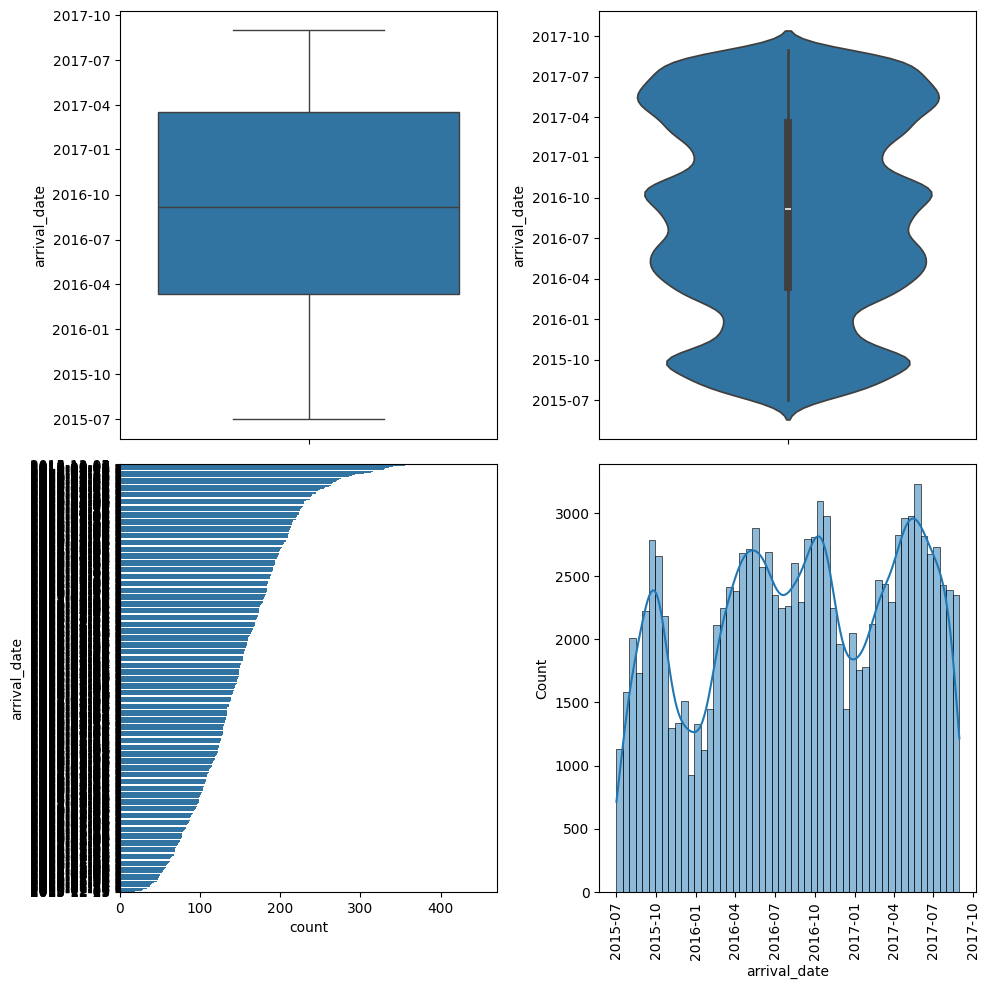

In [27]:
#create a new column from the arrival_date_day_of_month, arrival_date_month, arrival_date_year columns
hotel_booking_df['arrival_date'] = pd.to_datetime(hotel_booking_df['arrival_date_day_of_month'].astype(str) + '-' + hotel_booking_df['arrival_date_month'].astype(str) + '-' + hotel_booking_df['arrival_date_year'].astype(str), format='%d-%B-%Y')
# hotel_booking_df['arrival_date']
create_plots(hotel_booking_df, "arrival_date")

In [28]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

**Data Transformations**

In [29]:
#data Transformations
hotel_booking_df['meal_encoded'] = hotel_booking_df['meal'].map({'BB': 0, 'HB': 1, 'FB': 2, 'SC': 3, 'Undefined': 3})
hotel_booking_df['market_segment_encoded'] = hotel_booking_df['market_segment'].map({'Online TA': 0, 'Direct': 1, 'Corporate': 2, 'Groups': 3, 'Undefined': 4, 'Offline TA/TO': 5, 'Complementary': 6, 'Aviation': 7})
hotel_booking_df['distribution_channel_encoded'] = hotel_booking_df['distribution_channel'].map({'TA/TO': 0, 'Direct': 1, 'Corporate': 2, 'GDS': 3, 'Undefined': 4})
hotel_booking_df['reserved_room_type_encoded'] = hotel_booking_df['reserved_room_type'].map({'A': 0, 'D': 1, 'E': 2, 'B': 3, 'C': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8, 'P': 9})
hotel_booking_df['deposit_type_encoded'] = hotel_booking_df['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})
hotel_booking_df['customer_type_encoded'] = hotel_booking_df['customer_type'].map({'Transient': 0, 'Transient-Party': 1, 'Contract': 2, 'Group': 3})
hotel_booking_df['reservation_status_encoded'] = hotel_booking_df['reservation_status'].map({'Check-Out': 0, 'Canceled': 1, 'No-Show': 2})
hotel_booking_df['reservation_status_date'] = pd.to_datetime(hotel_booking_df['reservation_status_date'], format='%Y-%m-%d')
hotel_booking_df['hotel_encoded'] = hotel_booking_df['hotel'].map({'City Hotel': 0, 'Resort Hotel': 1})

#extracting day, month, week number and year from reservation_status_date
hotel_booking_df['reservation_status_day'] = hotel_booking_df['reservation_status_date'].dt.day
hotel_booking_df['reservation_status_month'] = hotel_booking_df['reservation_status_date'].dt.month
hotel_booking_df['reservation_status_week'] = hotel_booking_df['reservation_status_date'].dt.isocalendar().week
hotel_booking_df['reservation_status_year'] = hotel_booking_df['reservation_status_date'].dt.year

In [30]:
label_encoder = LabelEncoder()
hotel_booking_df['country_encoded'] = label_encoder.fit_transform(hotel_booking_df['country'])
hotel_booking_df['assigned_room_type_encoded'] = label_encoder.fit_transform(hotel_booking_df['assigned_room_type'])


**Bivariate Analysis:**

Analyze the relationship between pairs of variables (e.g., scatter plots, correlation matrices)


In [31]:
#extract numerical colums from dataframe
def extract_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=[np.number])
    return numerical_columns

#extract categorical columns from dataframe
def extract_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=[object])
    return categorical_columns

hotel_booking_num_df = extract_numerical_columns(hotel_booking_df)
hotel_booking_cat_df = extract_categorical_columns(hotel_booking_df)


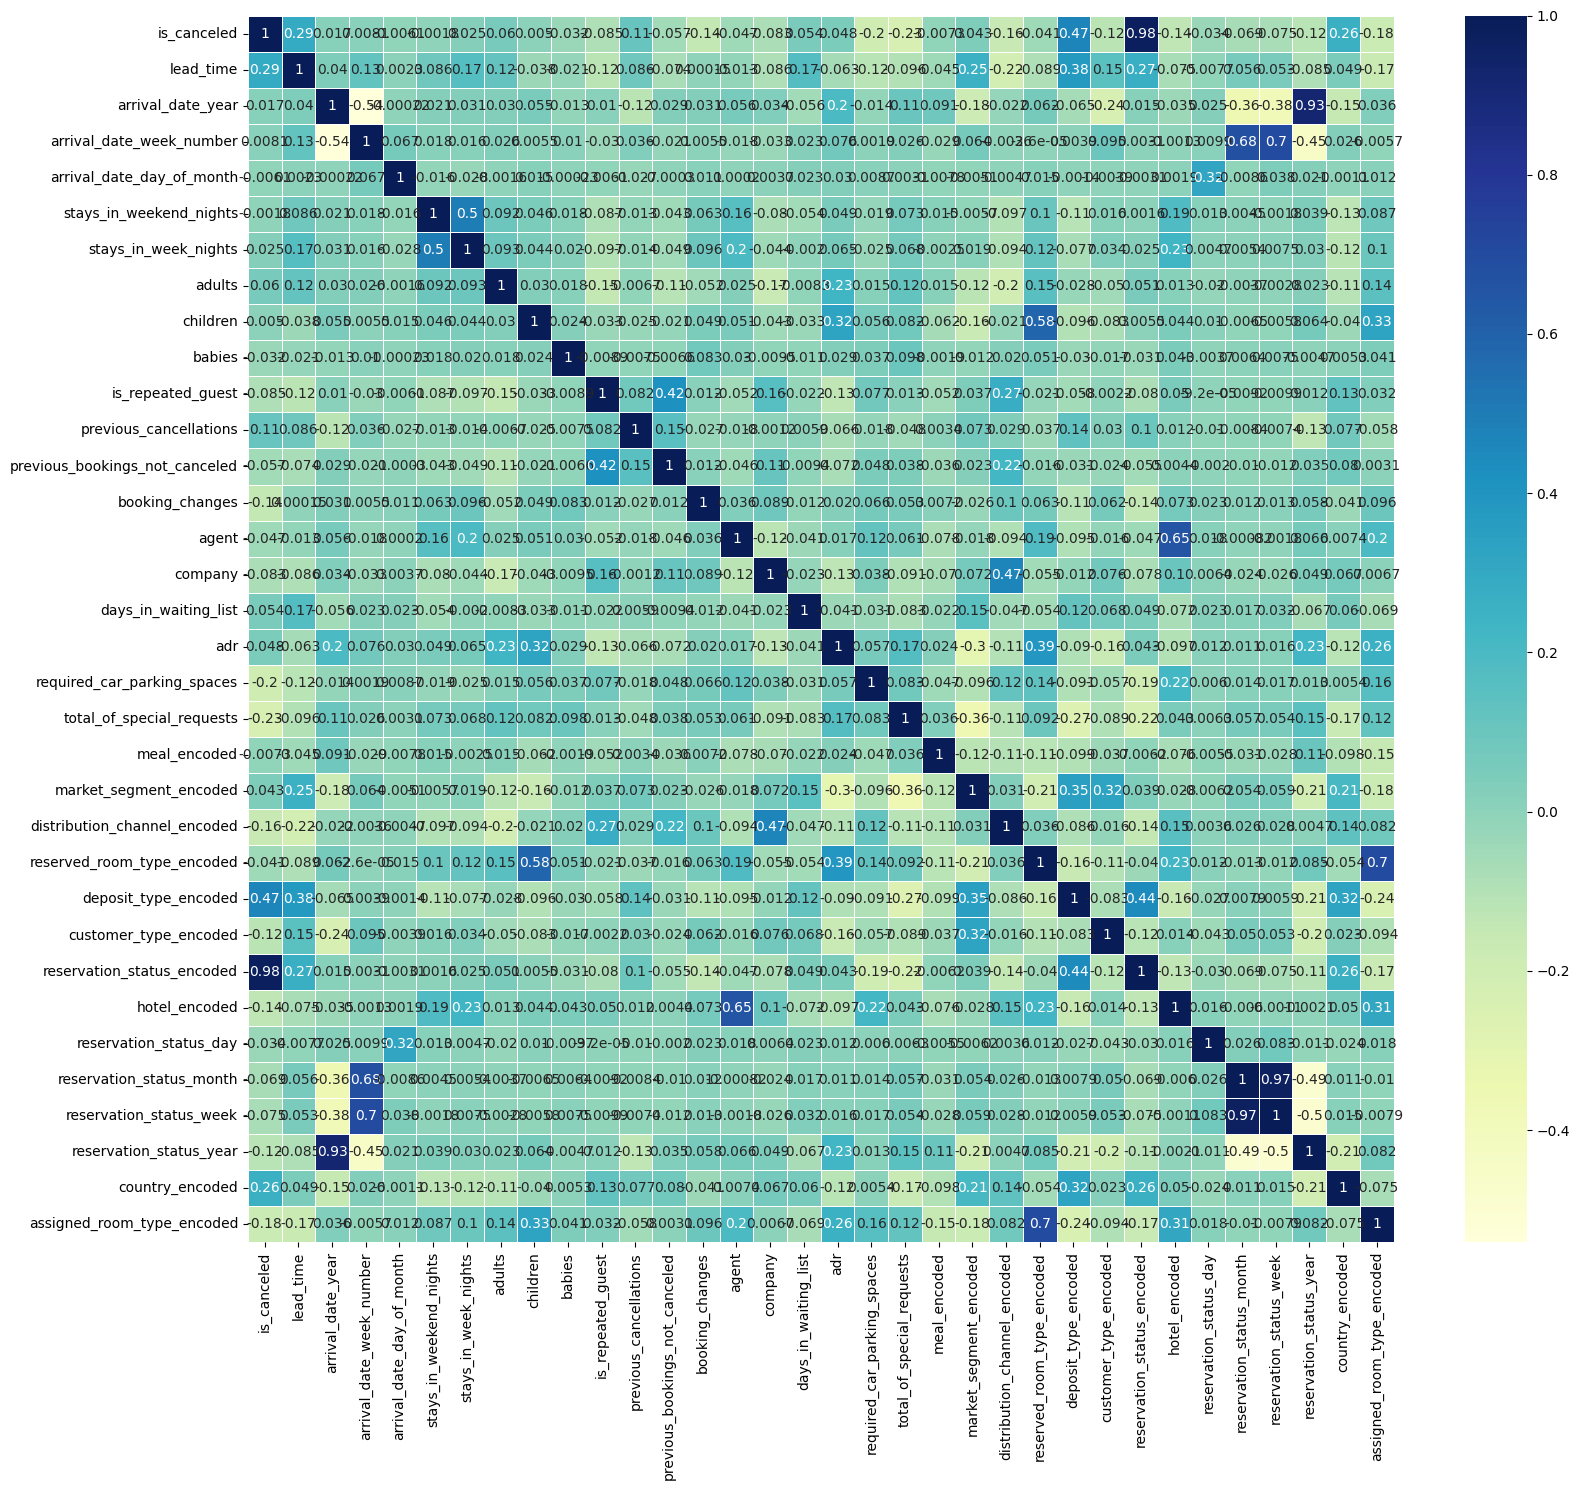

In [32]:
def plot_column_correlations(df, size=10):
    corr = df.corr()
    # sns.pairplot(df, height = 5, aspect=1)
    plt.figure(figsize=(17, 15))
    sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.5)
    plt.tight_layout()
    plt.show()

plot_column_correlations(hotel_booking_num_df)


In [33]:
#plot Bivariate(scatterplot, boxplot, violin)

def plot_distributions(df: pd.DataFrame, x: str, y: str, fig_width: int = 14, fig_height: int= 5)-> None:
  fig, ax = plt.subplots(1, 3, figsize=(14, 5))
  sns.regplot(x=x, y=y, data=df, ax=ax[0])
  sns.boxplot(x=x, y=y, data=df, ax=ax[1])
  sns.violinplot(x=x, y=y, data=df, ax=ax[2])
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()


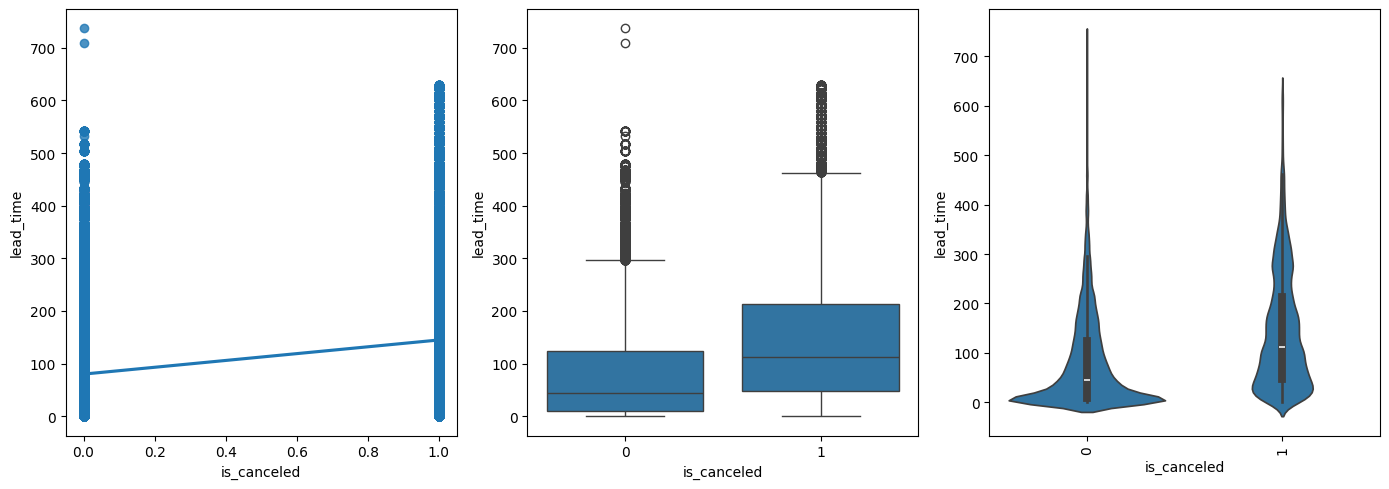

In [34]:
x = "is_canceled"
y = "lead_time"
plot_distributions(hotel_booking_num_df, x, y)

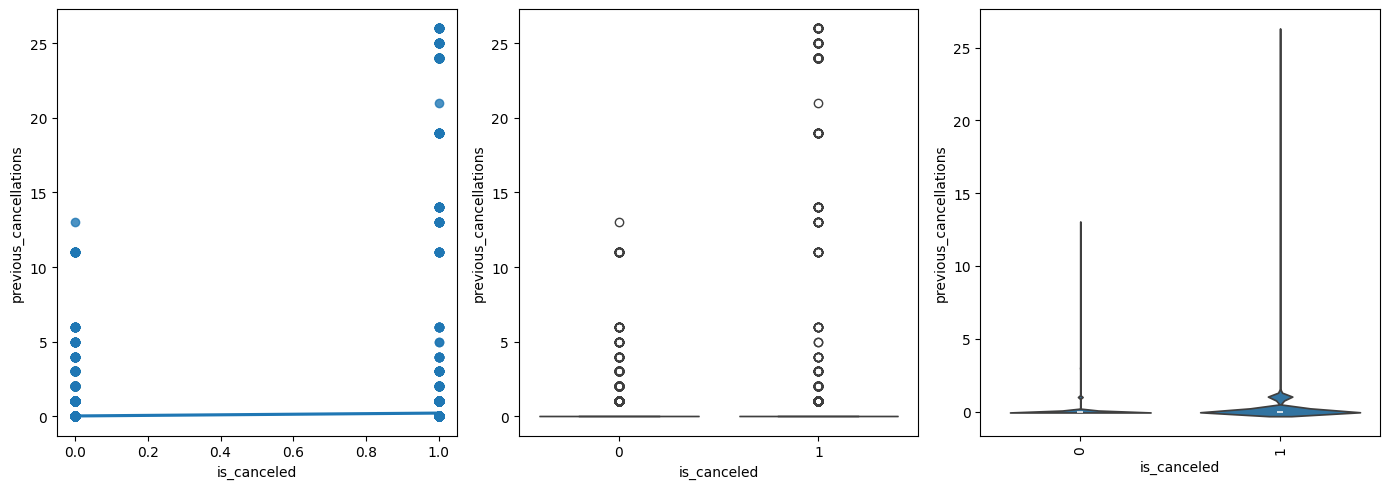

In [35]:
x = "is_canceled"
y = "previous_cancellations"
plot_distributions(hotel_booking_num_df, x, y)

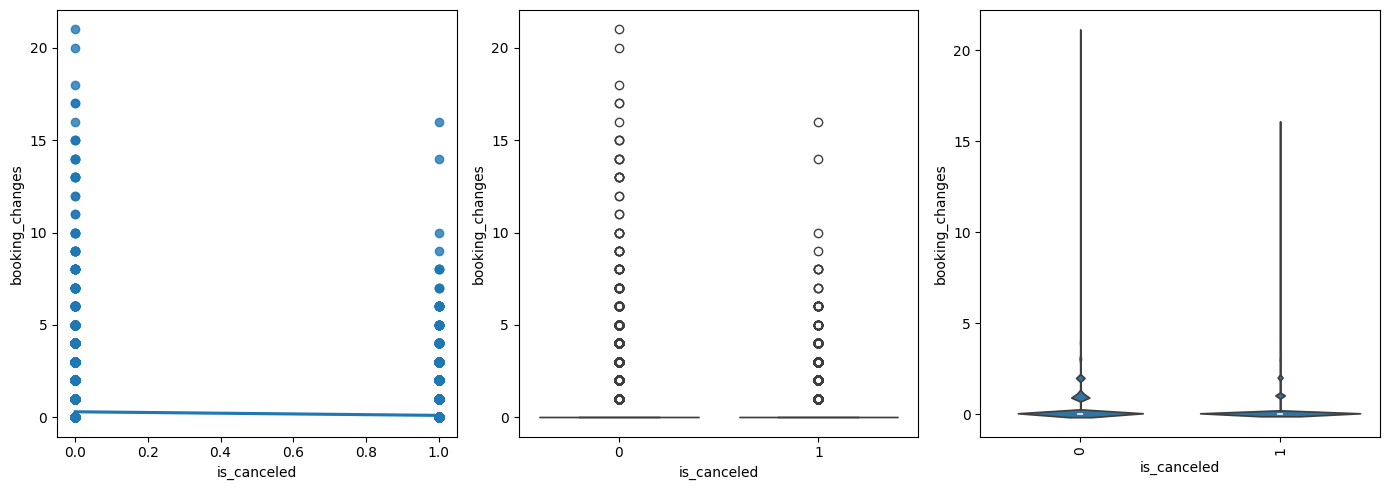

In [36]:
x = "is_canceled"
y = "booking_changes"
plot_distributions(hotel_booking_num_df, x, y)

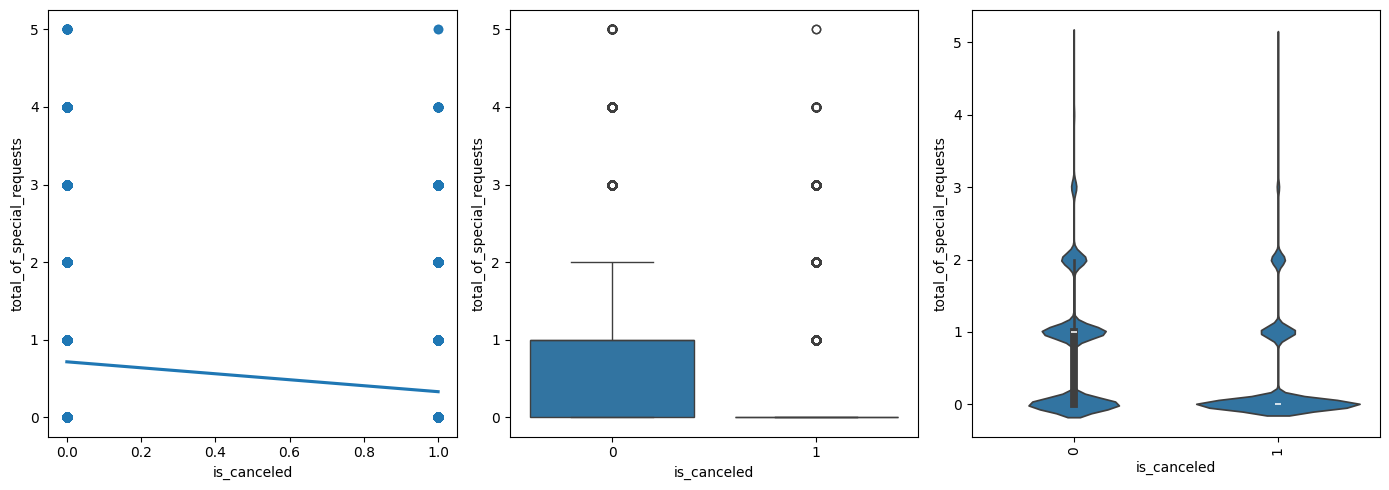

In [37]:
x = "is_canceled"
y = "total_of_special_requests"
plot_distributions(hotel_booking_num_df, x, y)

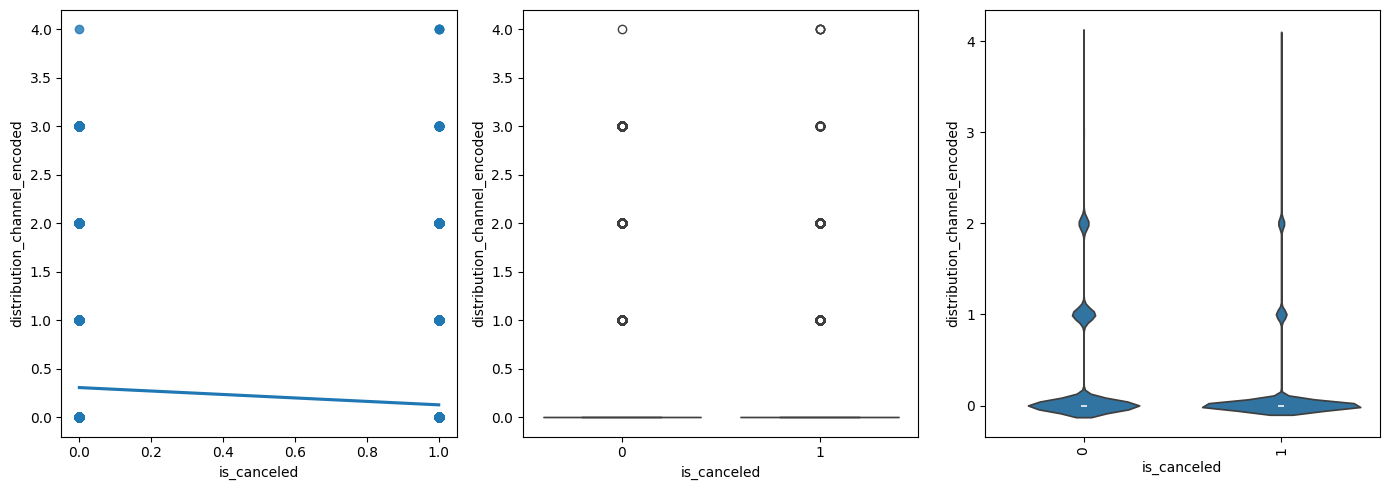

In [38]:
x = "is_canceled"
y = "distribution_channel_encoded"
plot_distributions(hotel_booking_num_df, x, y)

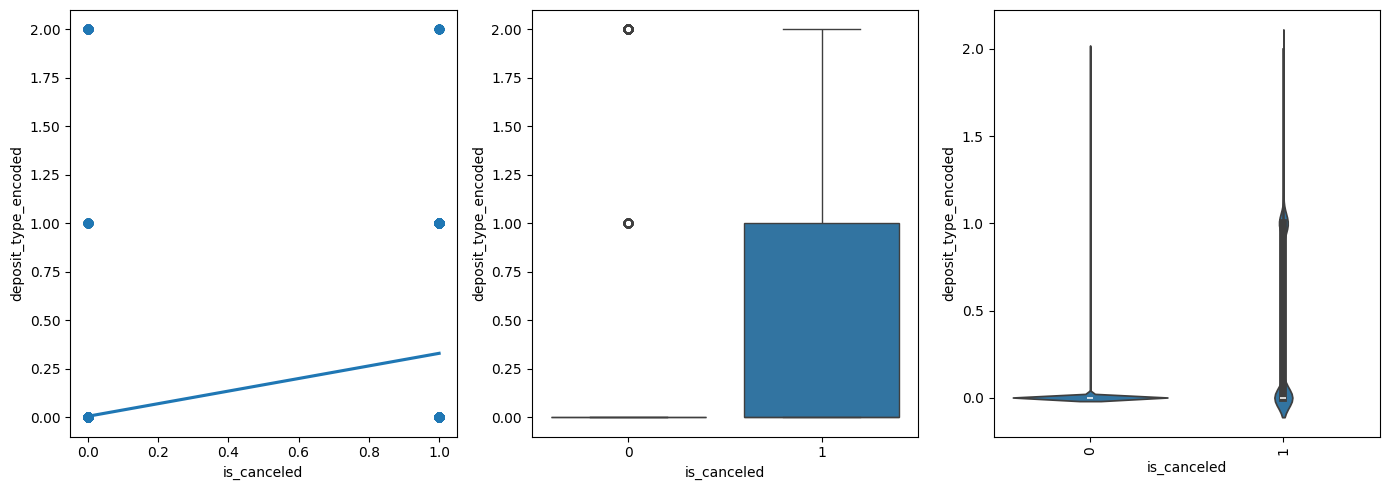

In [39]:
x = "is_canceled"
y = "deposit_type_encoded"
plot_distributions(hotel_booking_num_df, x, y)

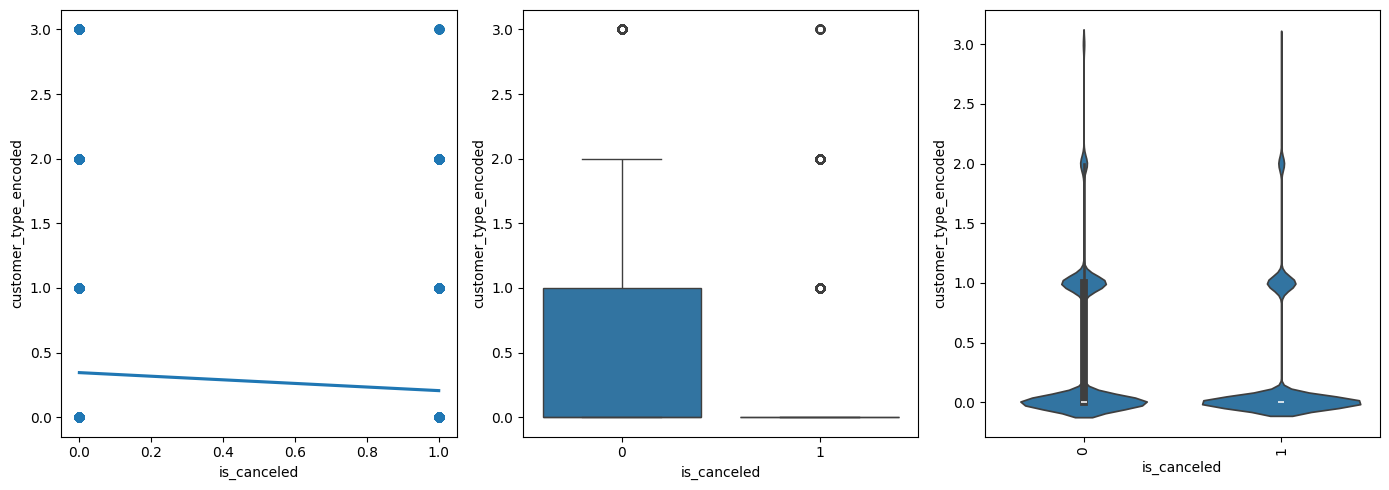

In [40]:
x = "is_canceled"
y = "customer_type_encoded"
plot_distributions(hotel_booking_num_df, x, y)

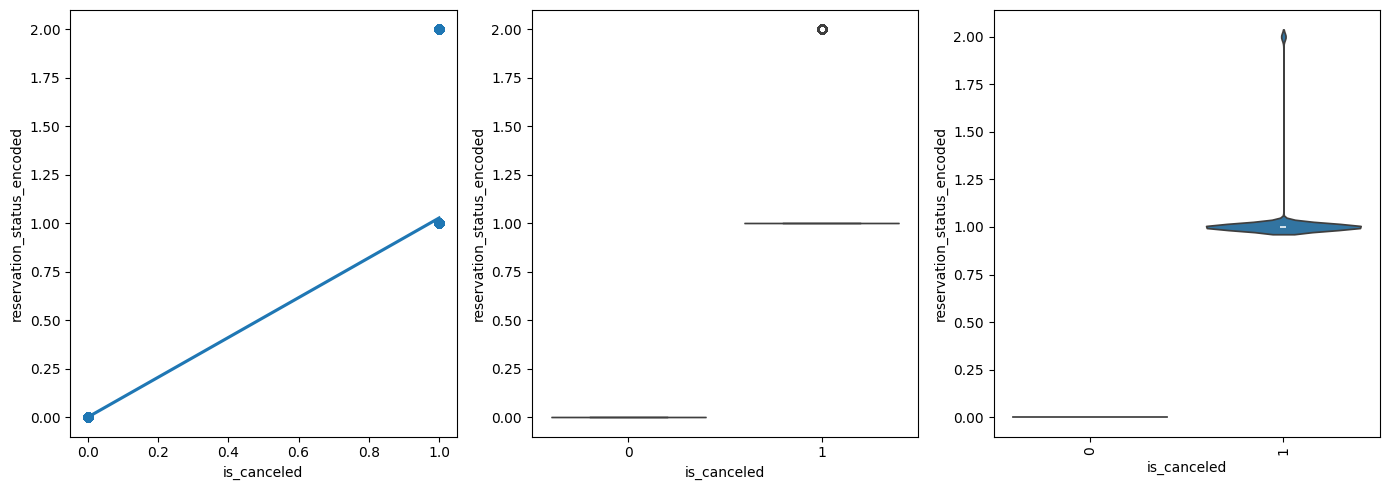

In [41]:
x = "is_canceled"
y = "reservation_status_encoded"
plot_distributions(hotel_booking_num_df, x, y)

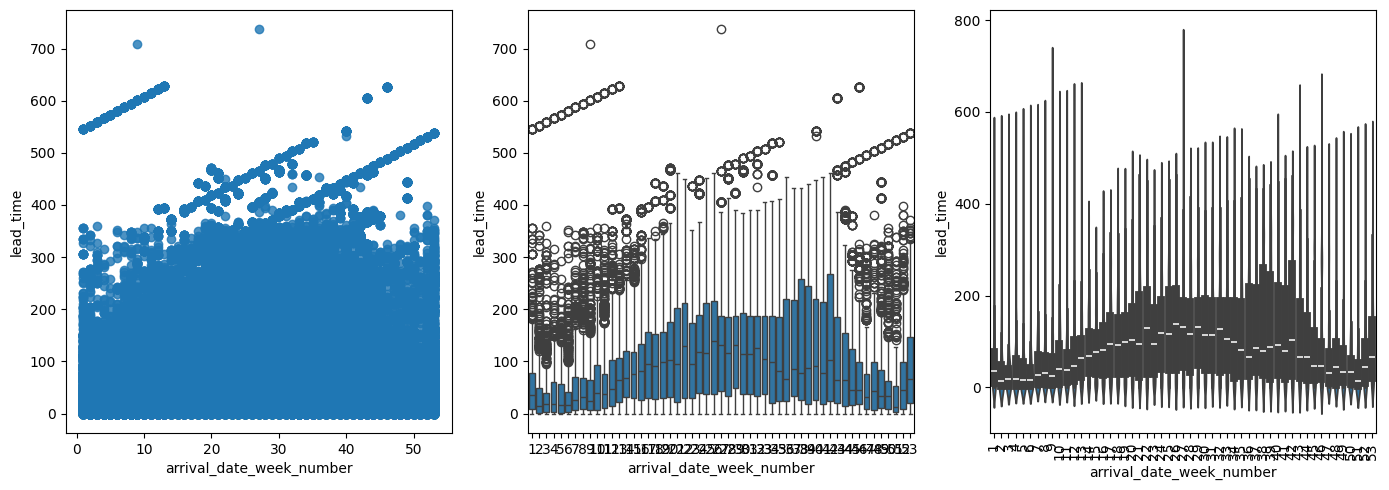

In [42]:
x = "arrival_date_week_number"
y = "lead_time"
plot_distributions(hotel_booking_num_df, x, y)

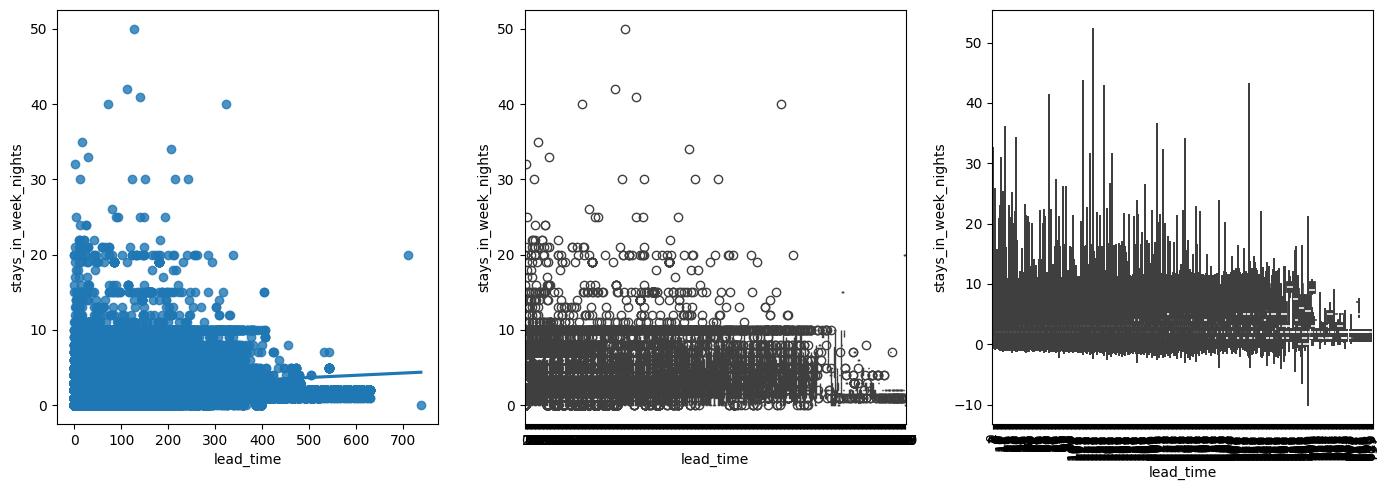

In [43]:
x = "lead_time"
y = "stays_in_week_nights"
plot_distributions(hotel_booking_num_df, x, y)

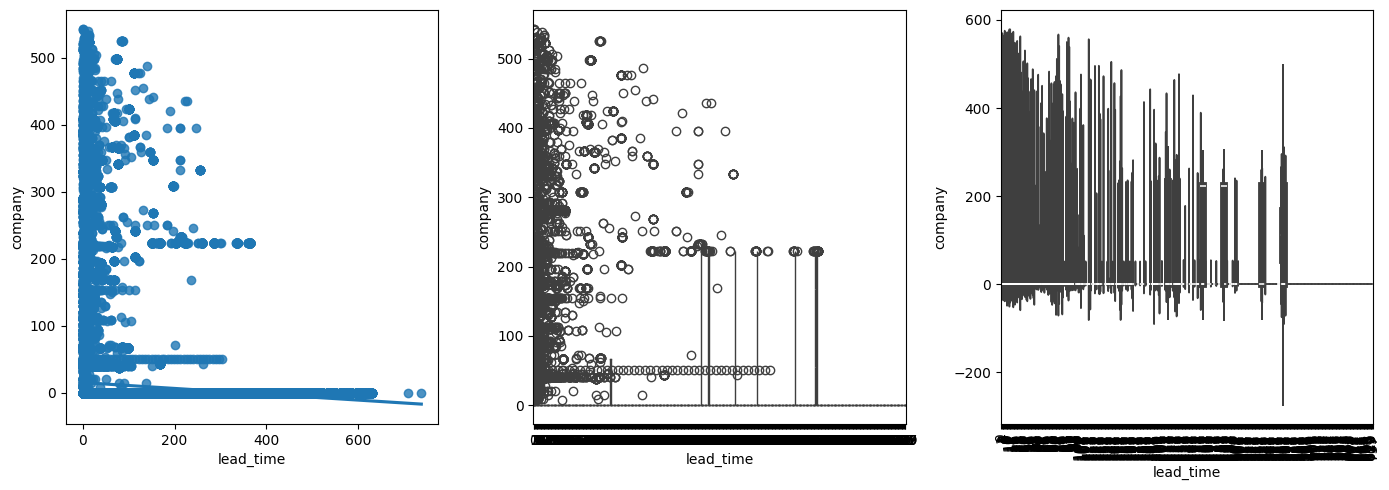

In [44]:
x = "lead_time"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

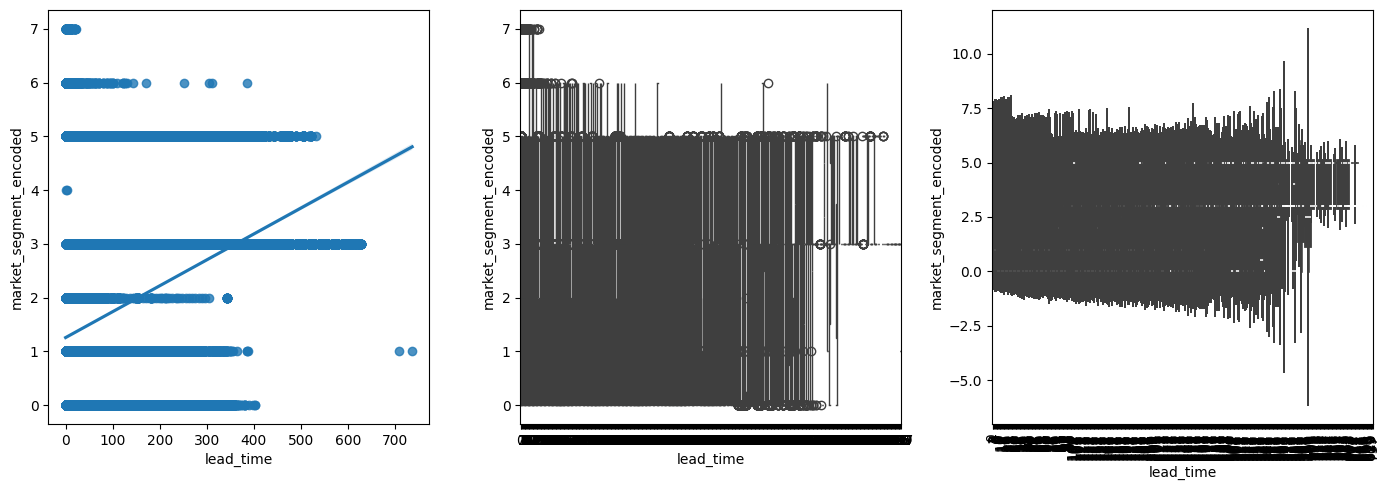

In [45]:
x = "lead_time"
y = "market_segment_encoded"
plot_distributions(hotel_booking_num_df, x, y)

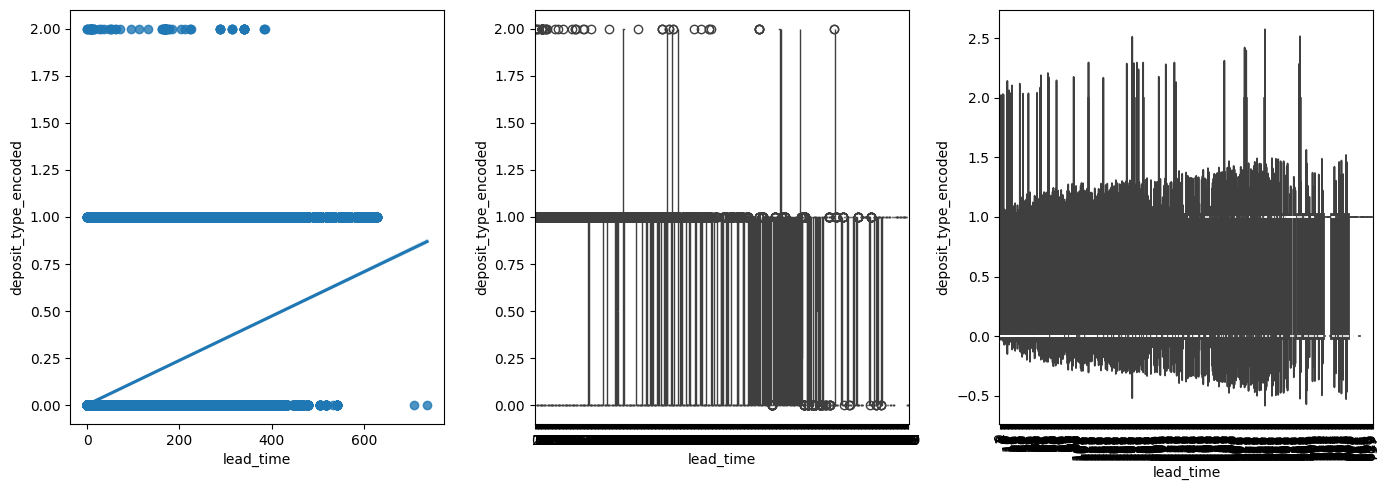

In [46]:
x = "lead_time"
y = "deposit_type_encoded"
plot_distributions(hotel_booking_num_df, x, y)

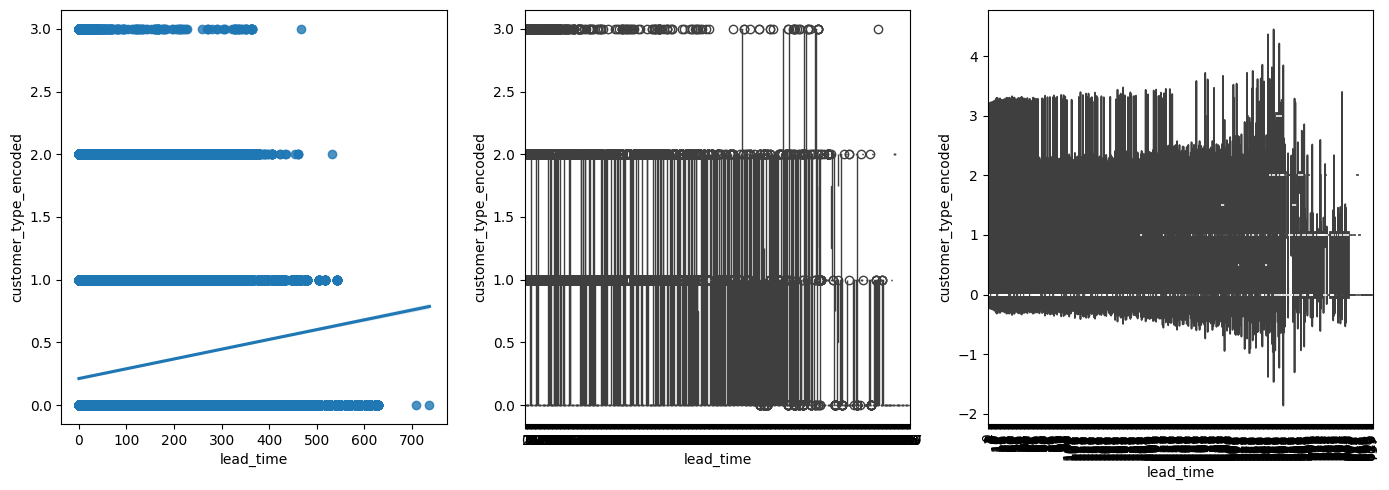

In [47]:
x = "lead_time"
y = "customer_type_encoded"
plot_distributions(hotel_booking_num_df, x, y)

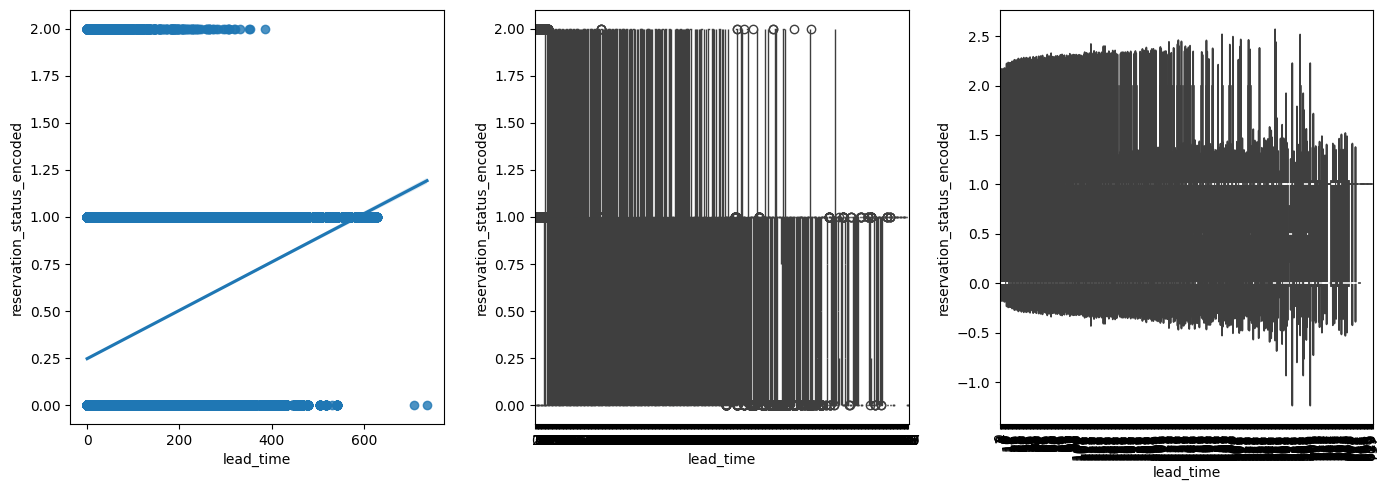

In [48]:
x = "lead_time"
y = "reservation_status_encoded"
plot_distributions(hotel_booking_num_df, x, y)

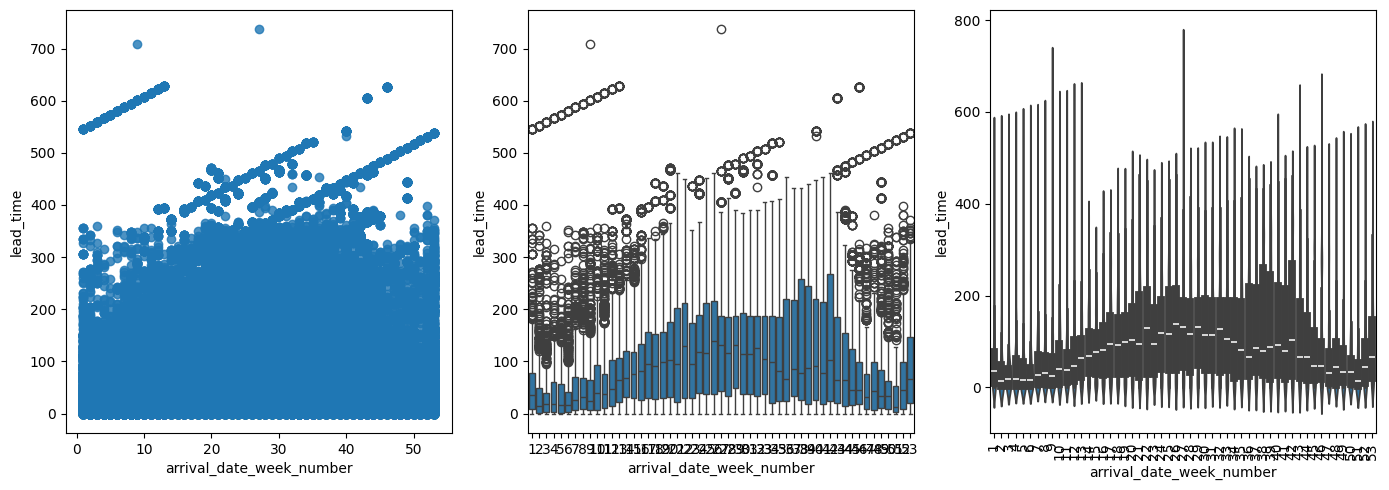

In [49]:
x = "arrival_date_week_number"
y = "lead_time"
plot_distributions(hotel_booking_num_df, x, y)

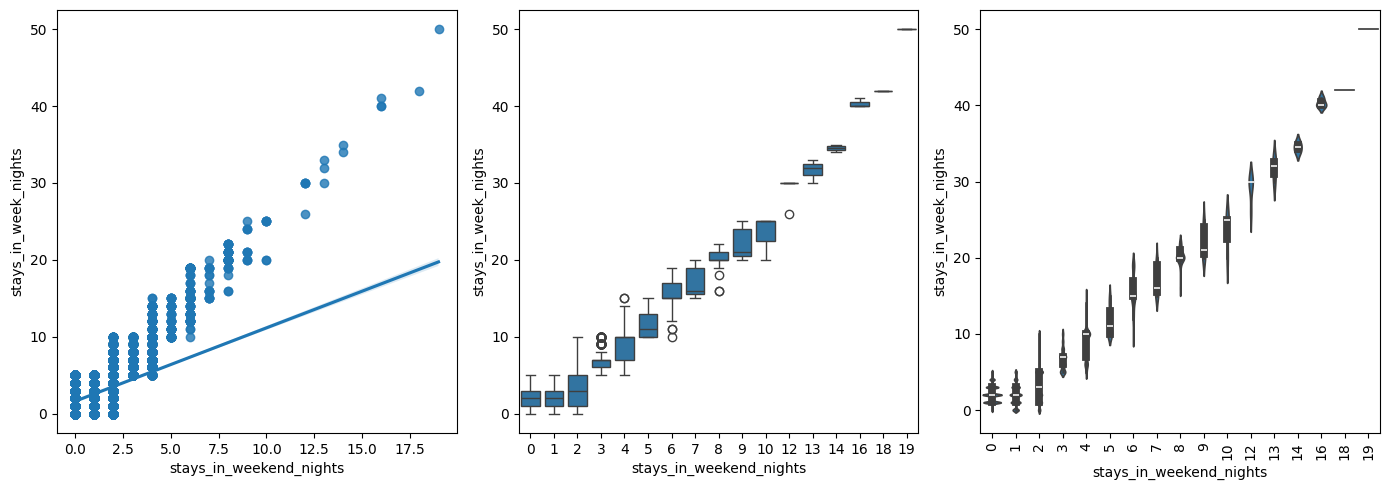

In [50]:
x = "stays_in_weekend_nights"
y = "stays_in_week_nights"
plot_distributions(hotel_booking_num_df, x, y)

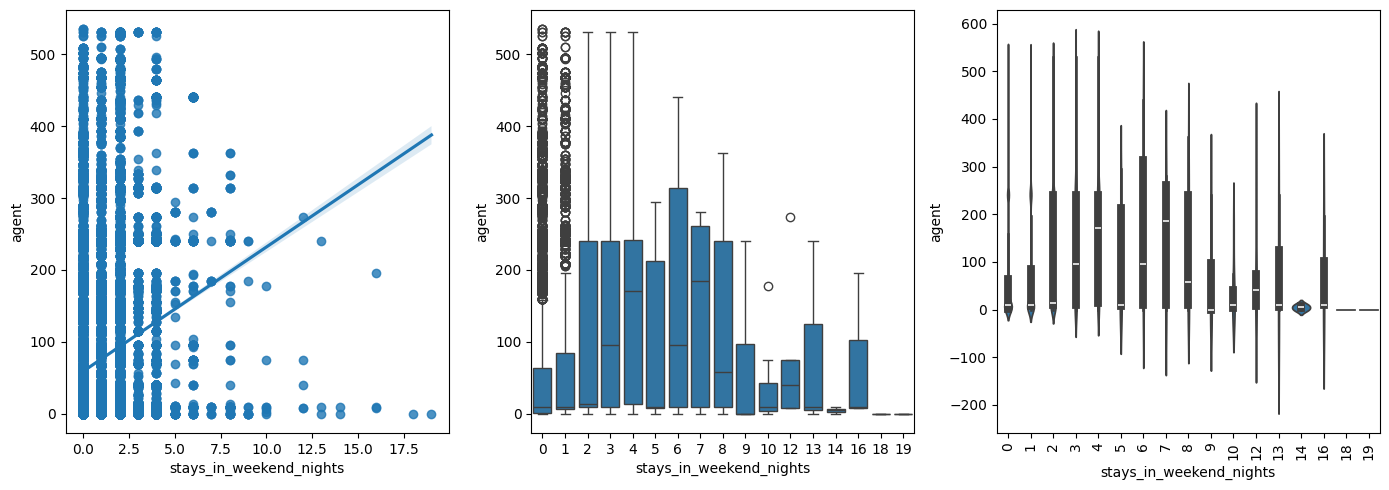

In [51]:
x = "stays_in_weekend_nights"
y = "agent"
plot_distributions(hotel_booking_num_df, x, y)

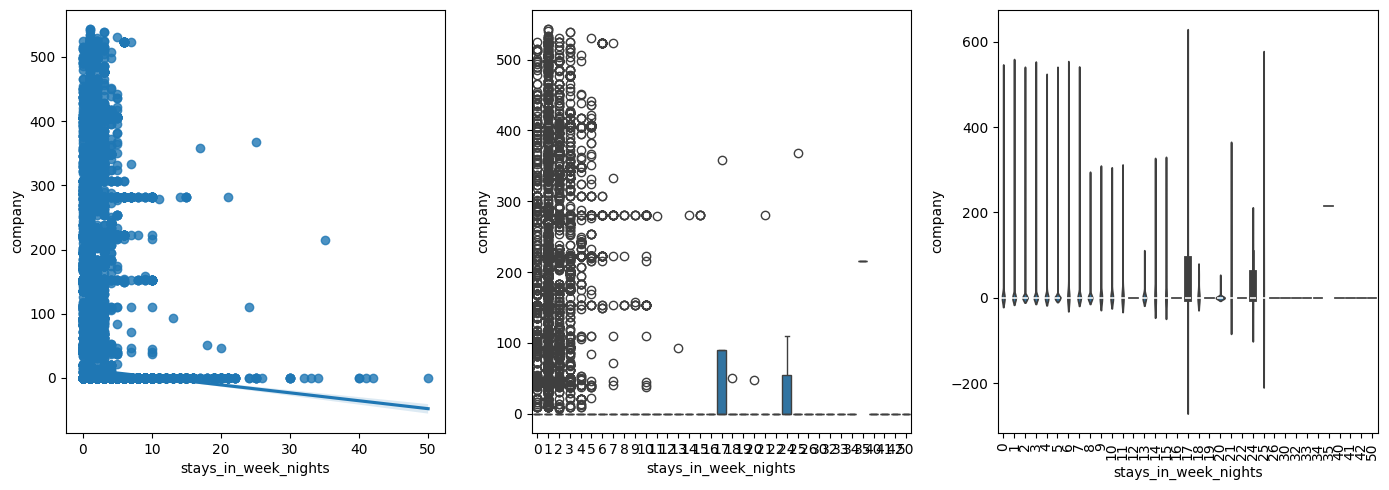

In [52]:
x = "stays_in_week_nights"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

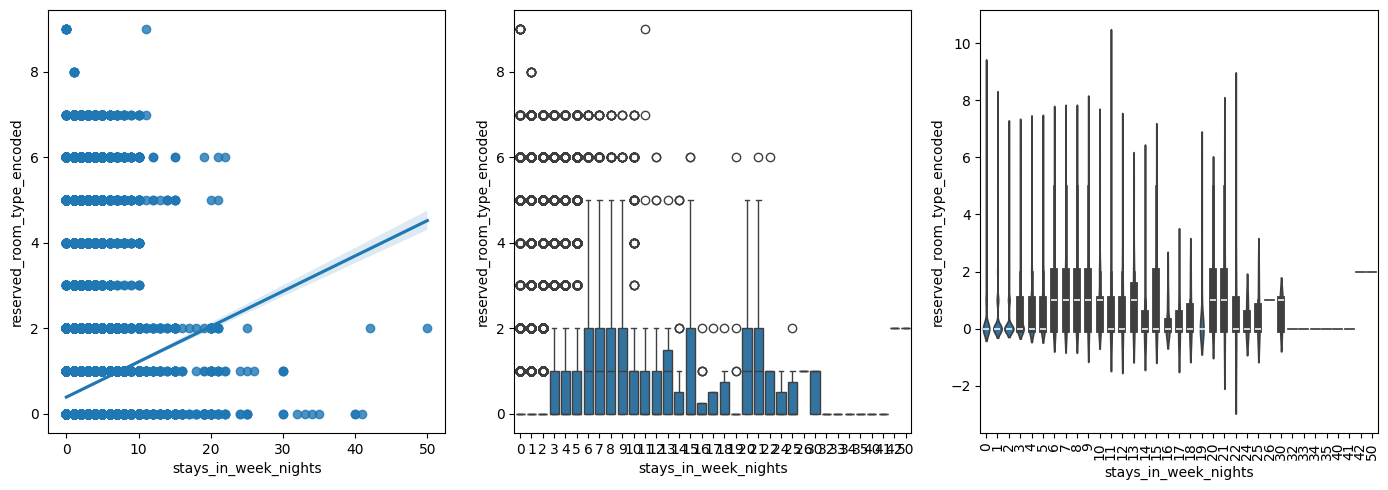

In [53]:
x = "stays_in_week_nights"
y = "reserved_room_type_encoded"
plot_distributions(hotel_booking_num_df, x, y)

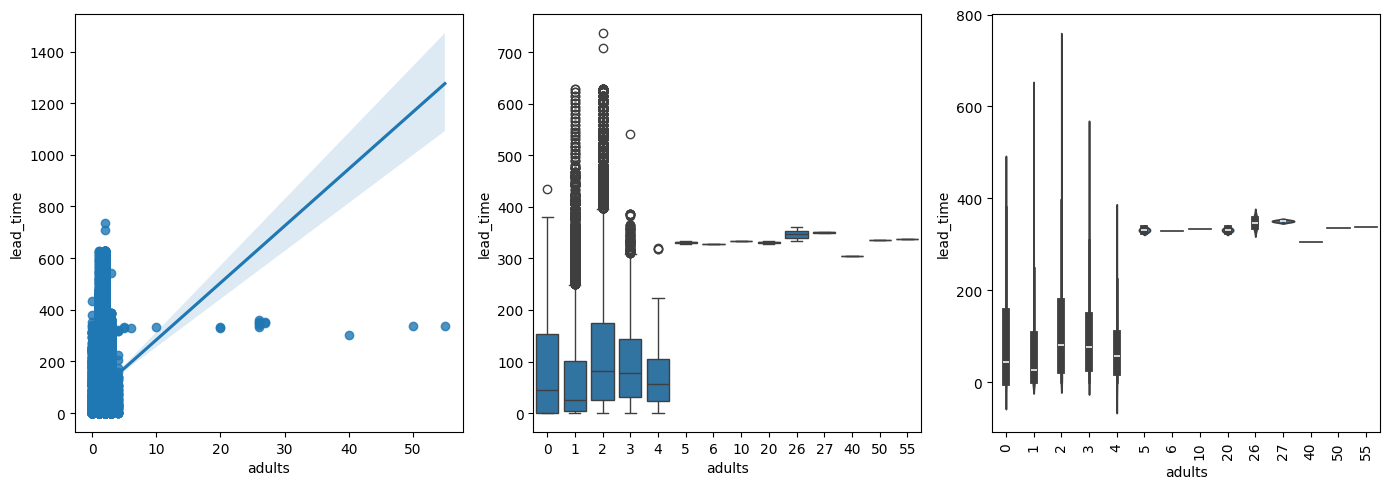

In [54]:
x = "adults"
y = "lead_time"
plot_distributions(hotel_booking_num_df, x, y)

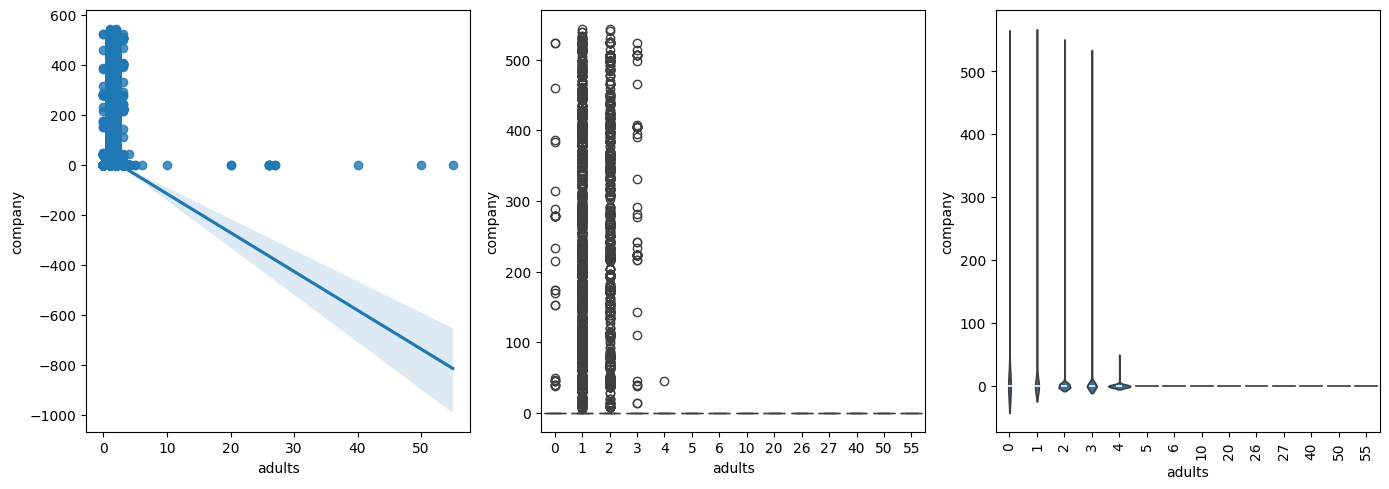

In [55]:
x = "adults"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

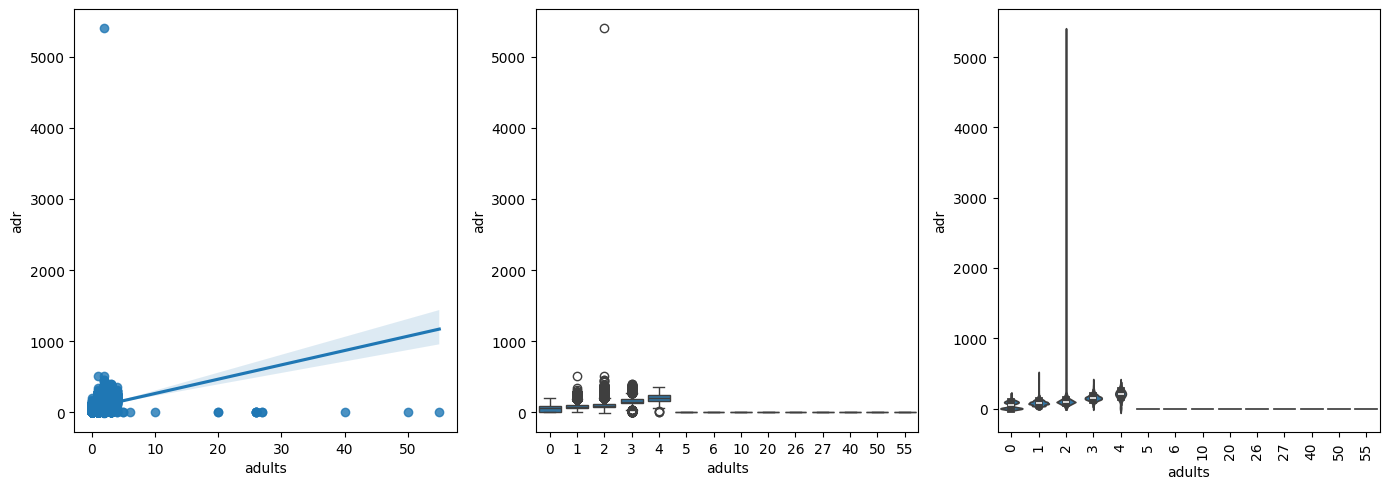

In [56]:
x = "adults"
y = "adr"
plot_distributions(hotel_booking_num_df, x, y)

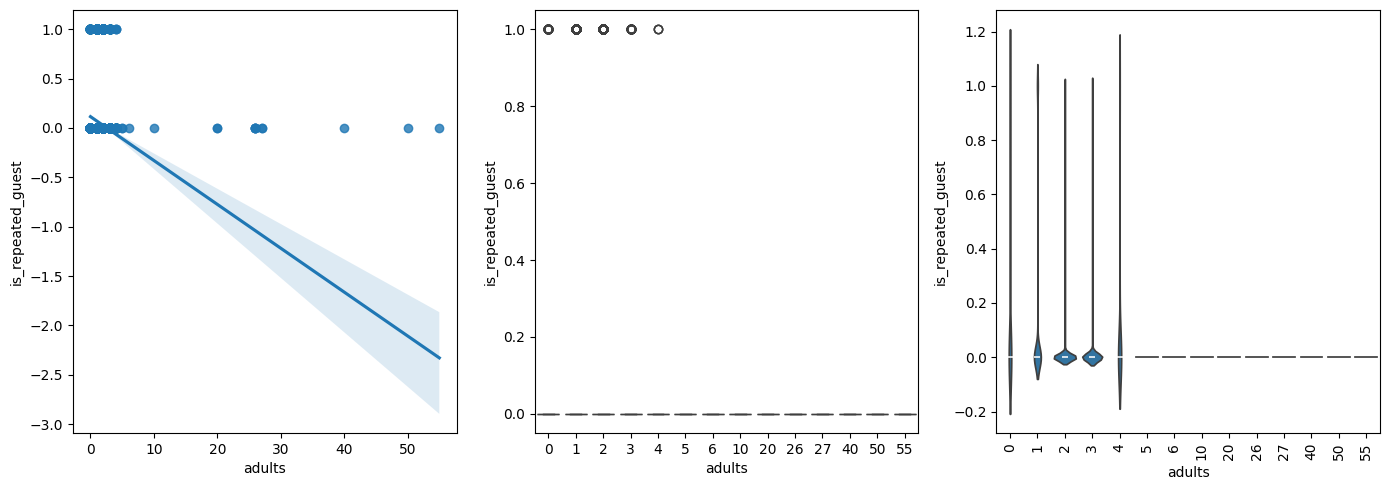

In [57]:
x = "adults"
y = "is_repeated_guest"
plot_distributions(hotel_booking_num_df, x, y)

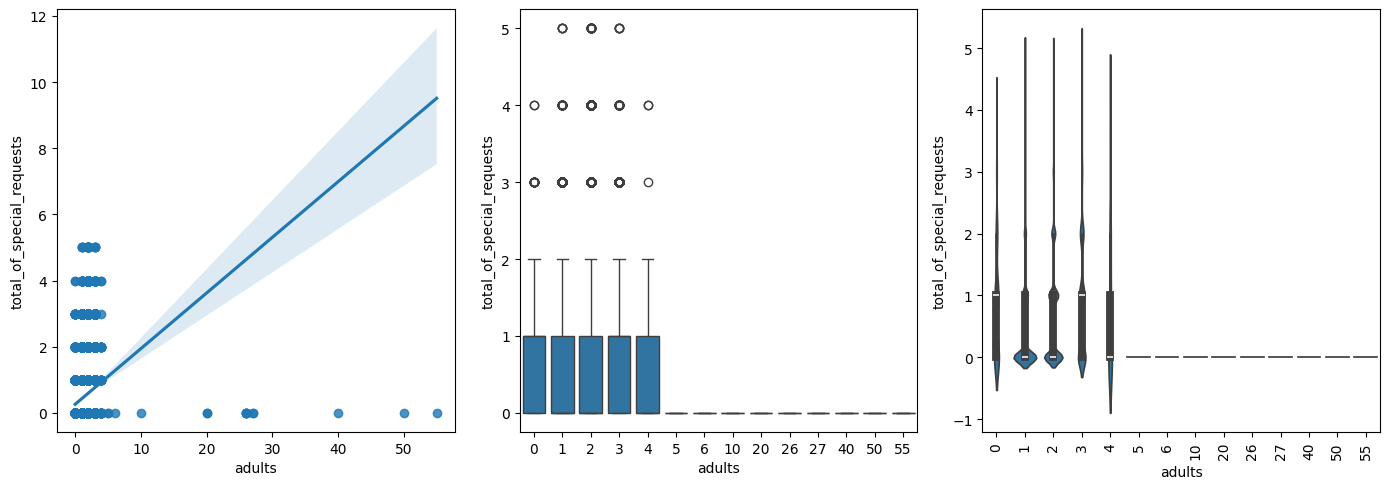

In [58]:
x = "adults"
y = "total_of_special_requests"
plot_distributions(hotel_booking_num_df, x, y)

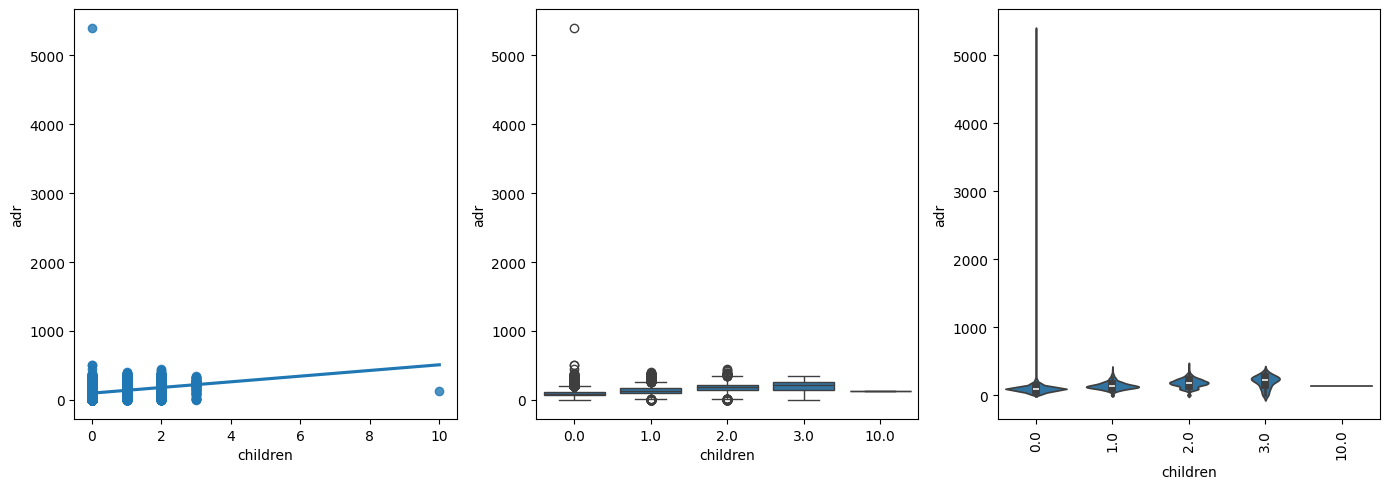

In [59]:
x = "children"
y = "adr"
plot_distributions(hotel_booking_num_df, x, y)

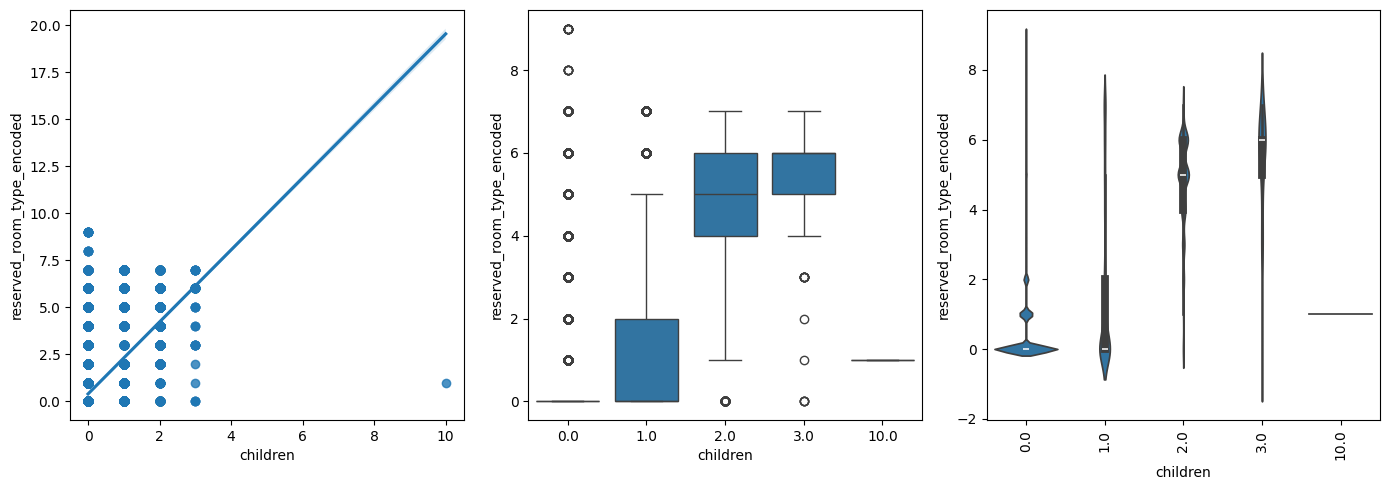

In [60]:
x = "children"
y = "reserved_room_type_encoded"
plot_distributions(hotel_booking_num_df, x, y)

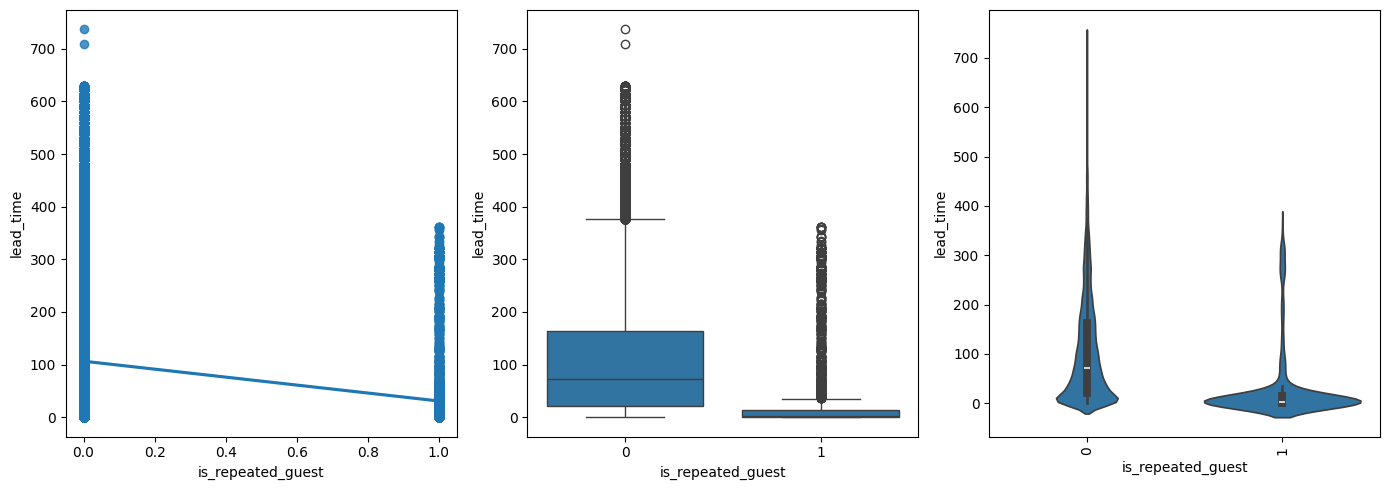

In [61]:
x = "is_repeated_guest"
y = "lead_time"
plot_distributions(hotel_booking_num_df, x, y)

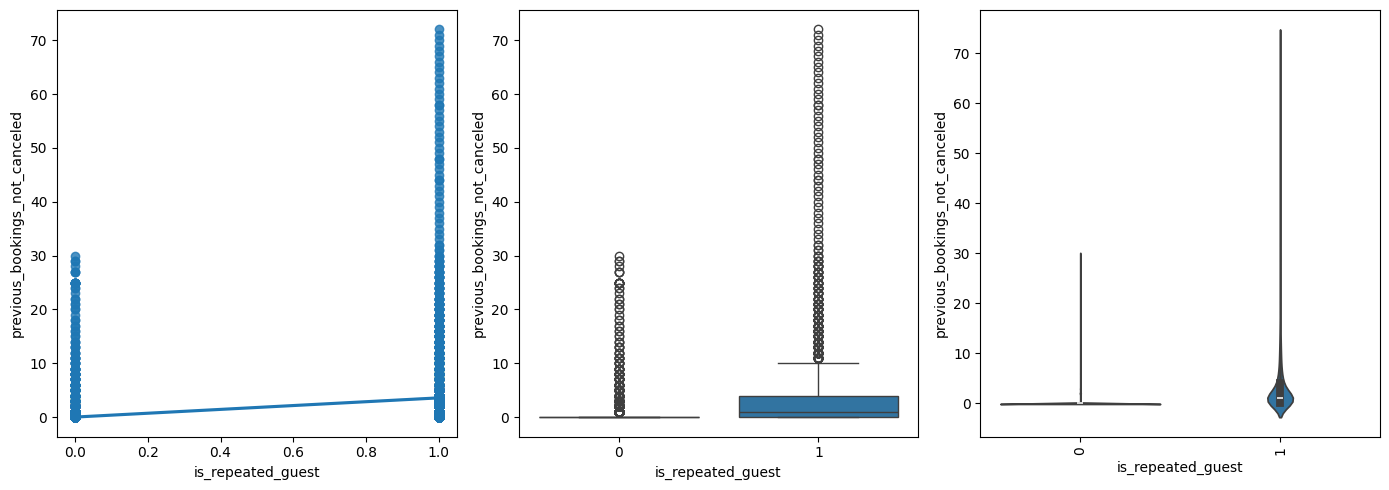

In [62]:
x = "is_repeated_guest"
y = "previous_bookings_not_canceled"
plot_distributions(hotel_booking_num_df, x, y)

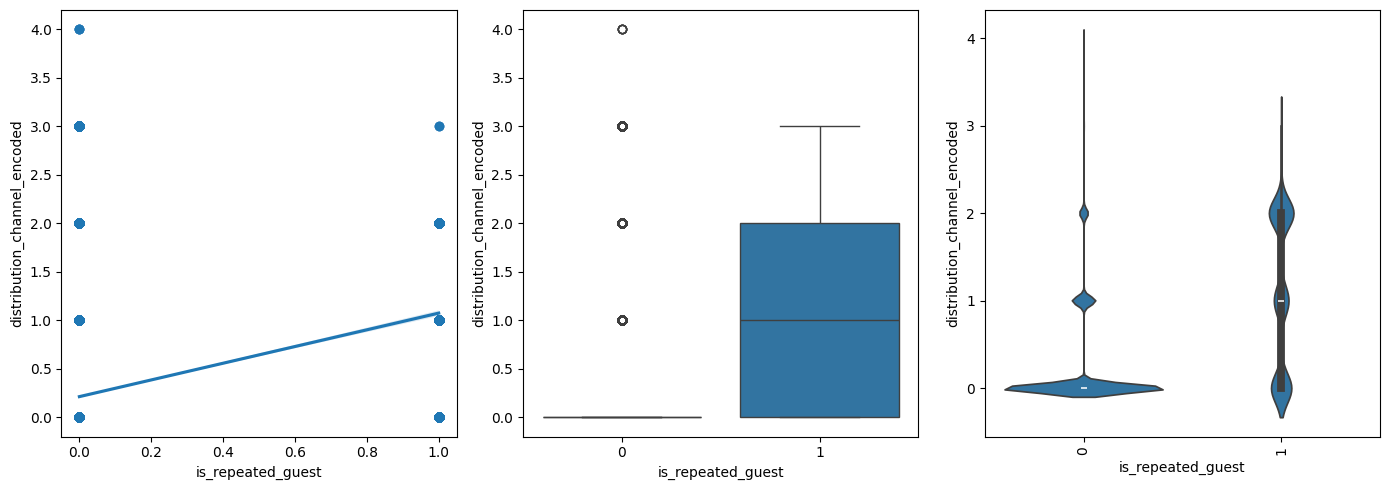

In [63]:
x = "is_repeated_guest"
y = "distribution_channel_encoded"
plot_distributions(hotel_booking_num_df, x, y)

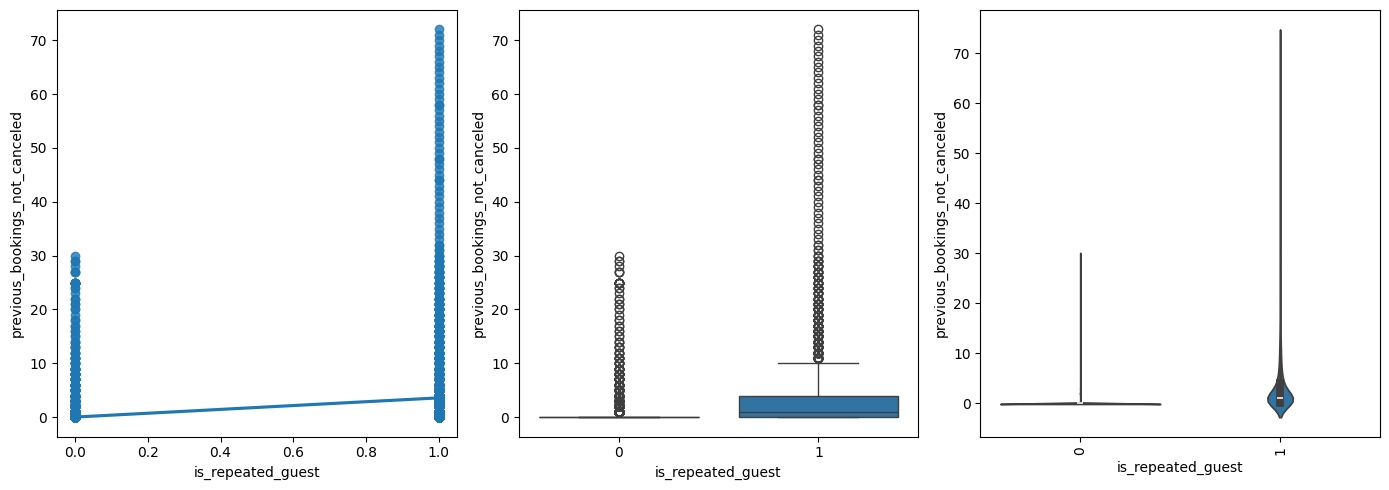

In [64]:
x = "is_repeated_guest"
y = "previous_bookings_not_canceled"

plot_distributions(hotel_booking_num_df, x, y)

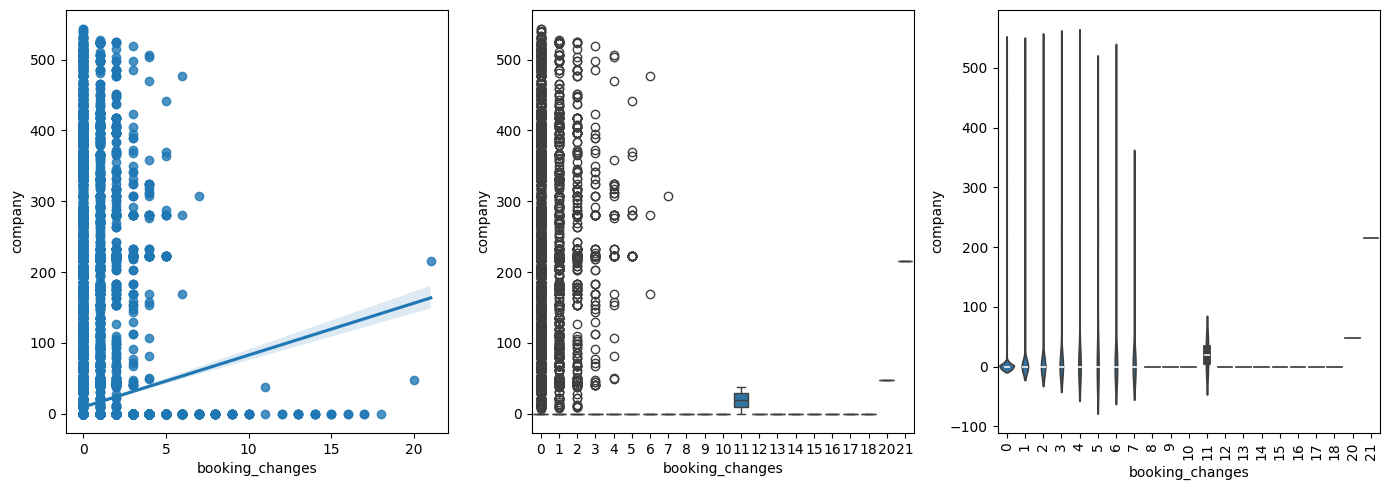

In [65]:
x = "booking_changes"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)


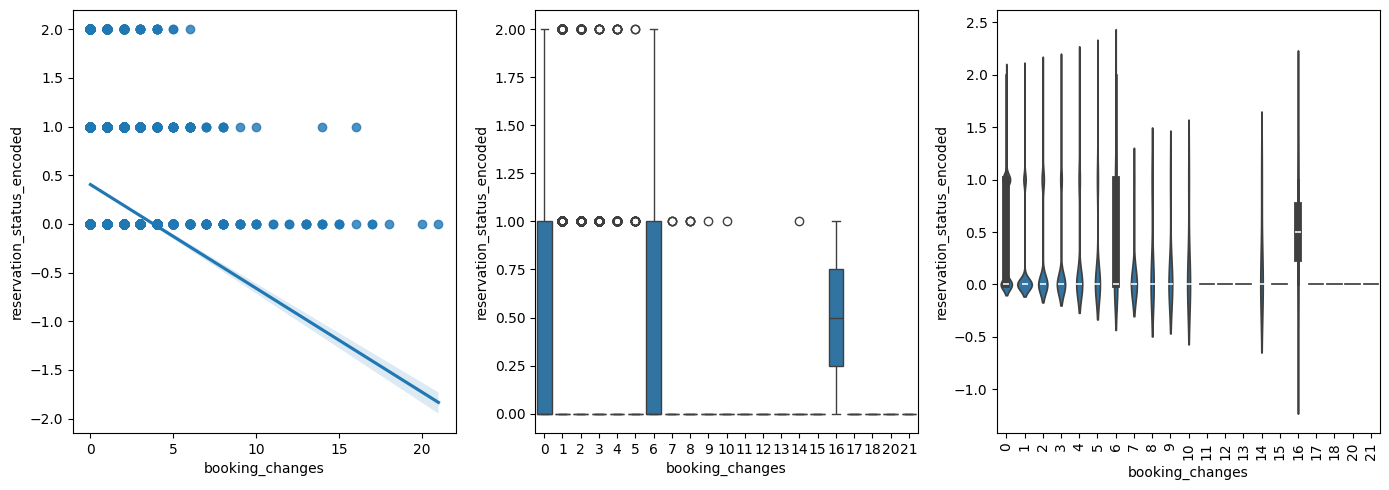

In [66]:
x = "booking_changes"
y = "reservation_status_encoded"
plot_distributions(hotel_booking_num_df, x, y)

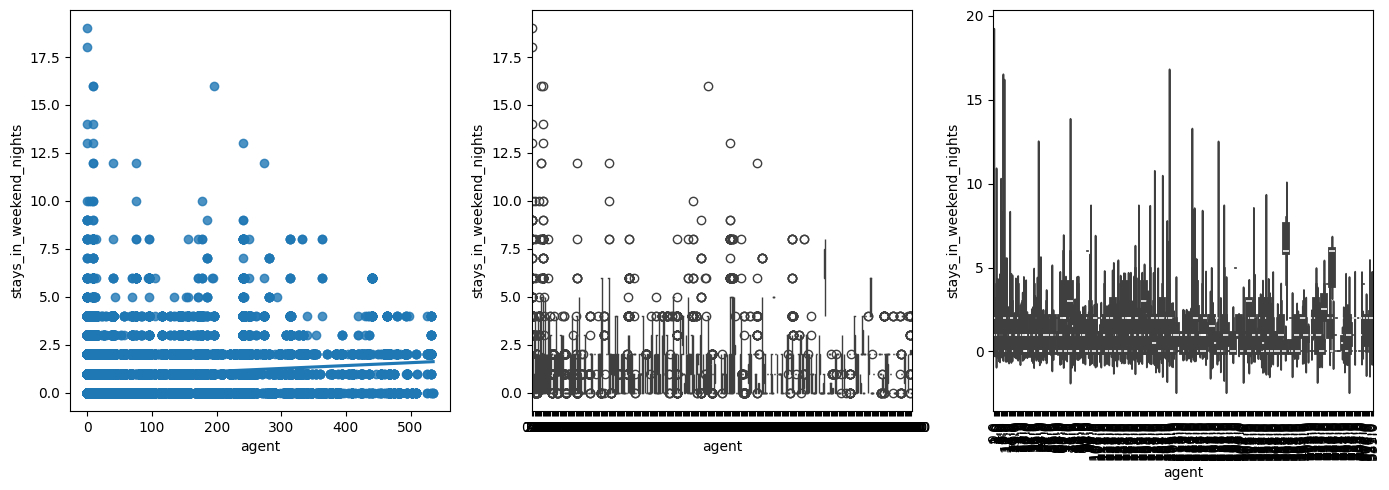

In [67]:
x = "agent"
y = "stays_in_weekend_nights"
plot_distributions(hotel_booking_num_df, x, y)

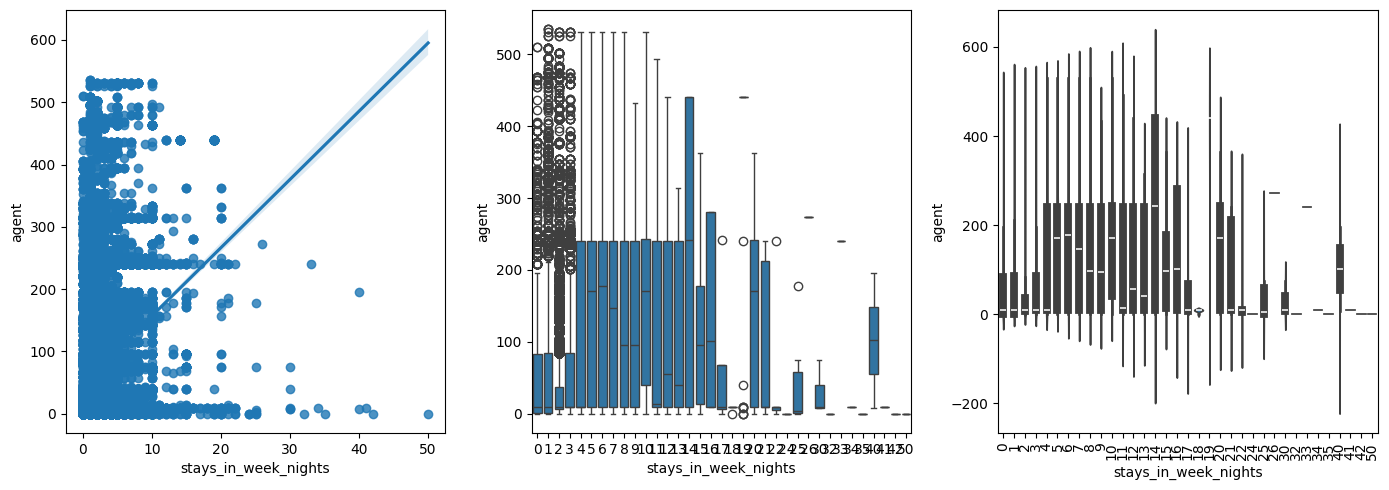

In [68]:
x = "stays_in_week_nights"
y = "agent"
plot_distributions(hotel_booking_num_df, x, y)

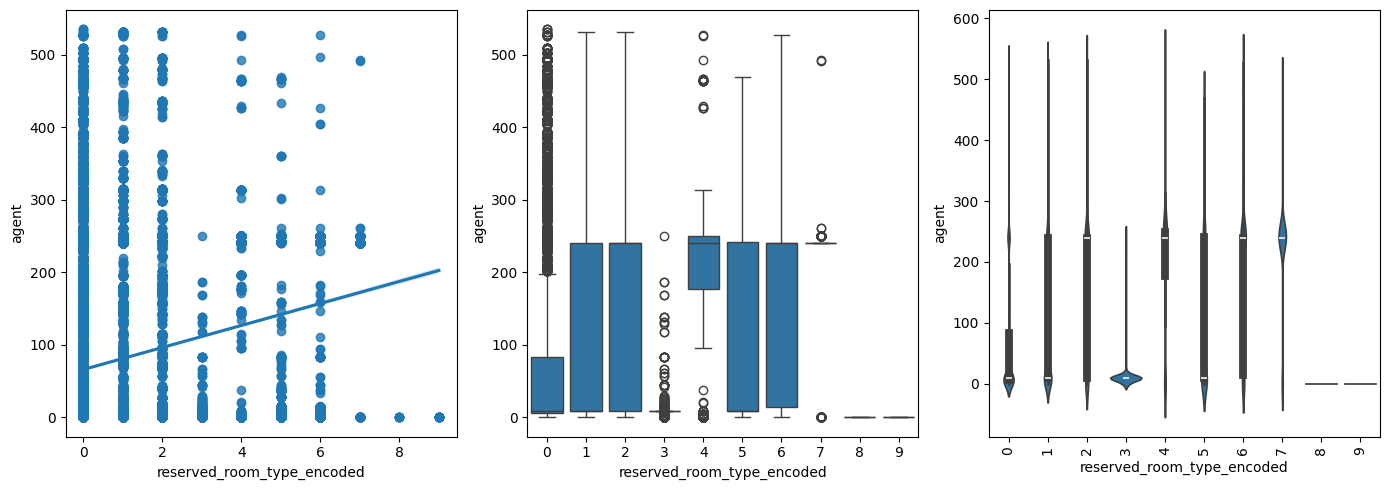

In [69]:
x = "reserved_room_type_encoded"
y = "agent"
plot_distributions(hotel_booking_num_df, x, y)

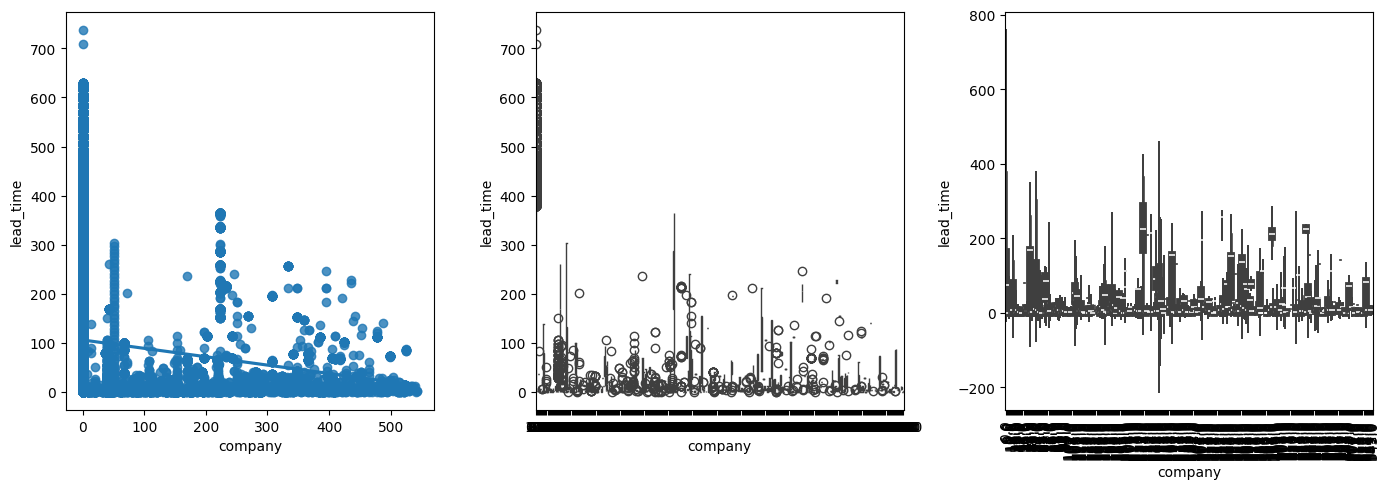

In [70]:
x = "company"
y = "lead_time"
plot_distributions(hotel_booking_num_df, x, y)

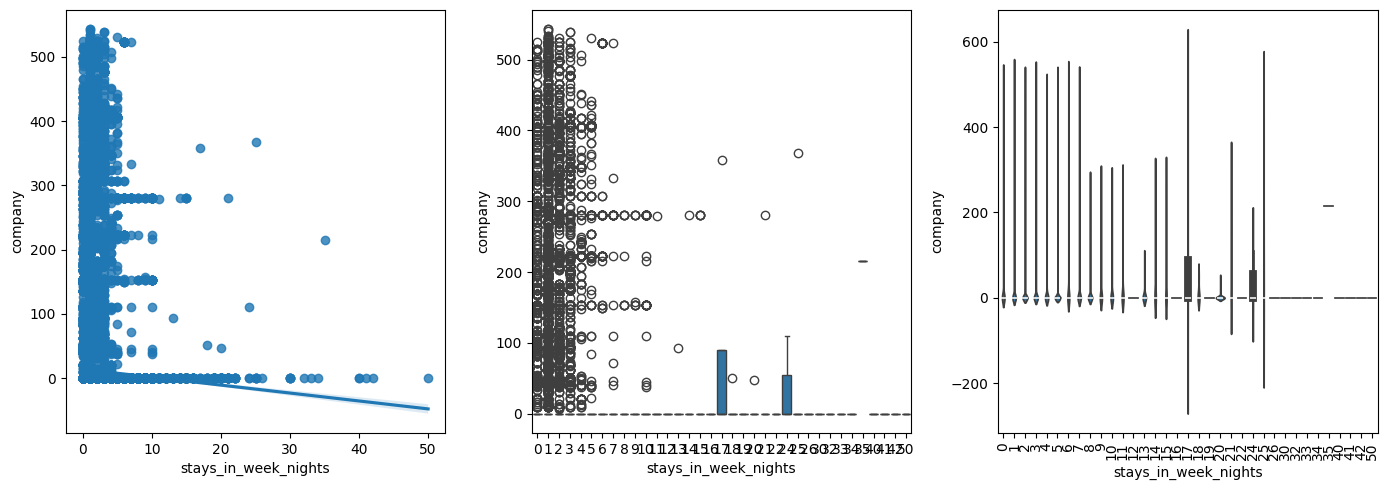

In [71]:
x = "stays_in_week_nights"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

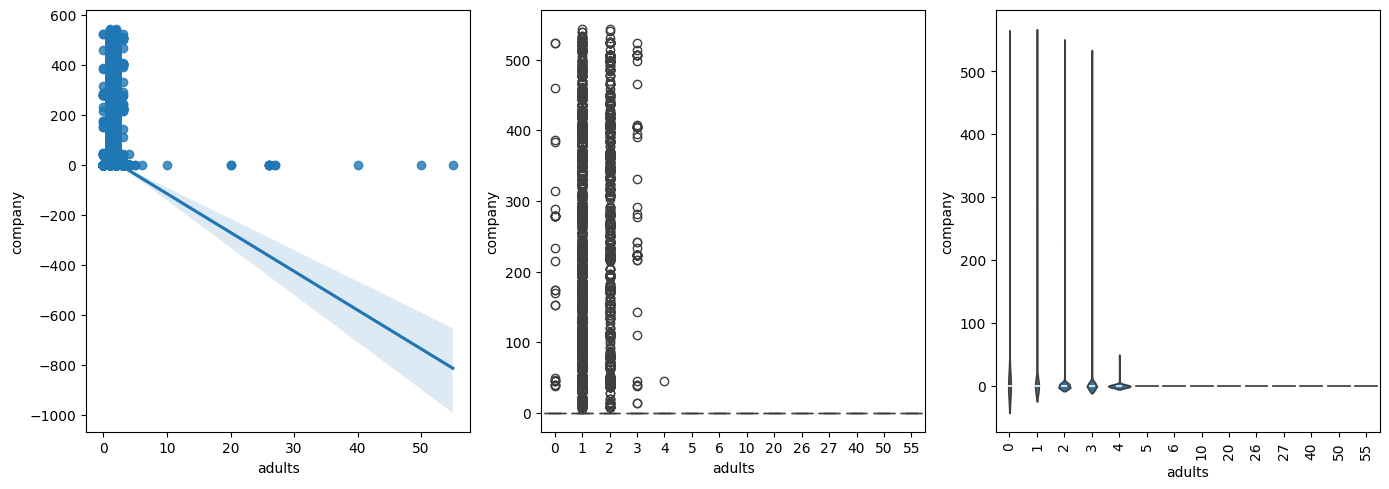

In [72]:
x = "adults"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

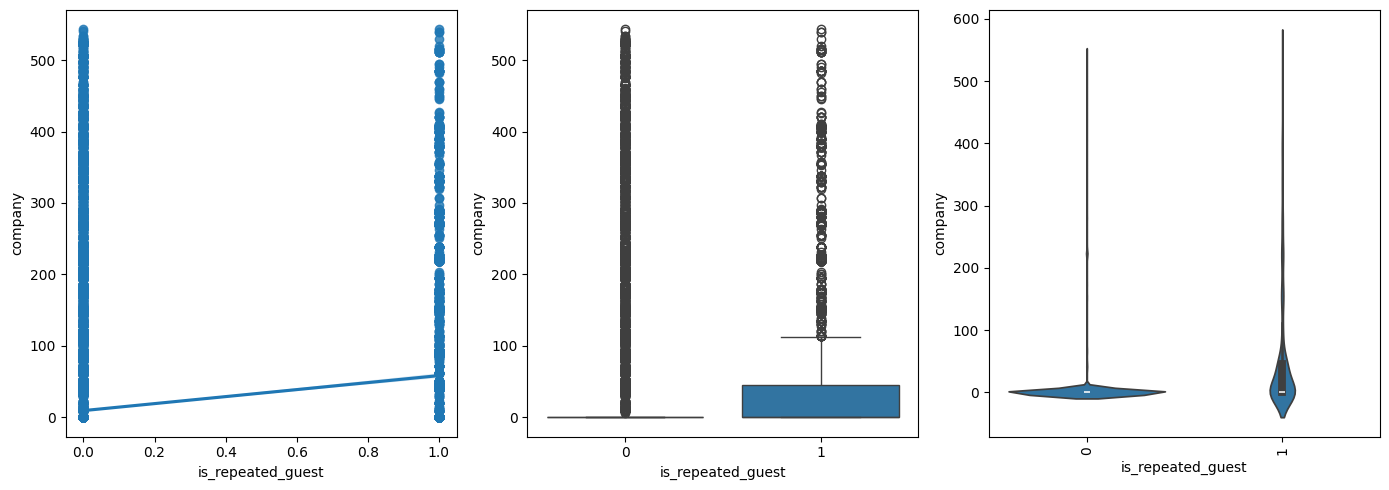

In [73]:
x = "is_repeated_guest"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

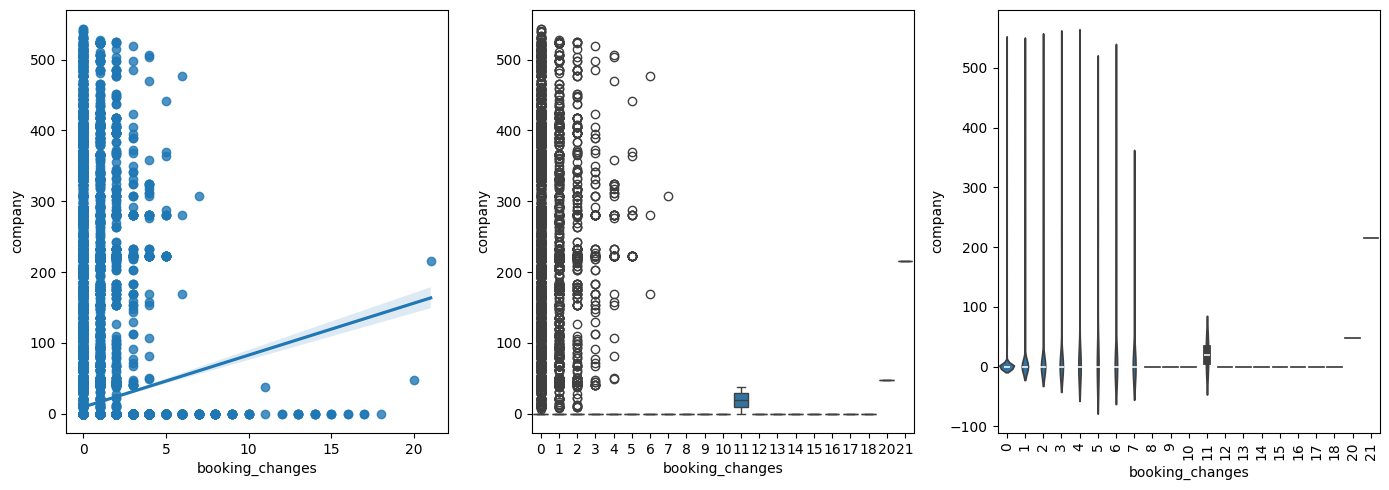

In [74]:
x = "booking_changes"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

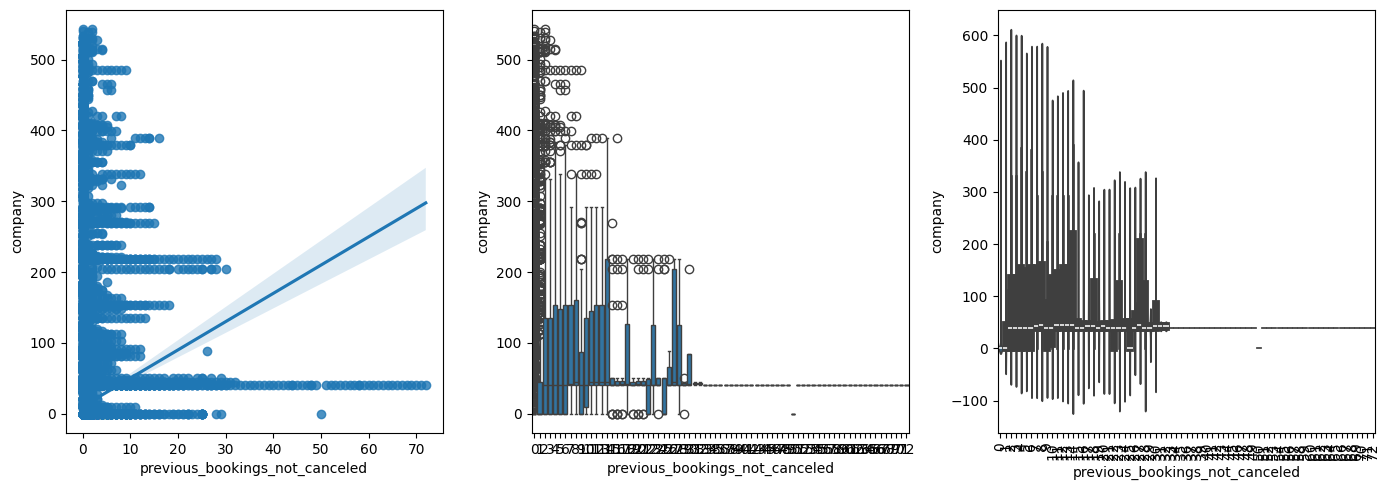

In [75]:
x = "previous_bookings_not_canceled"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

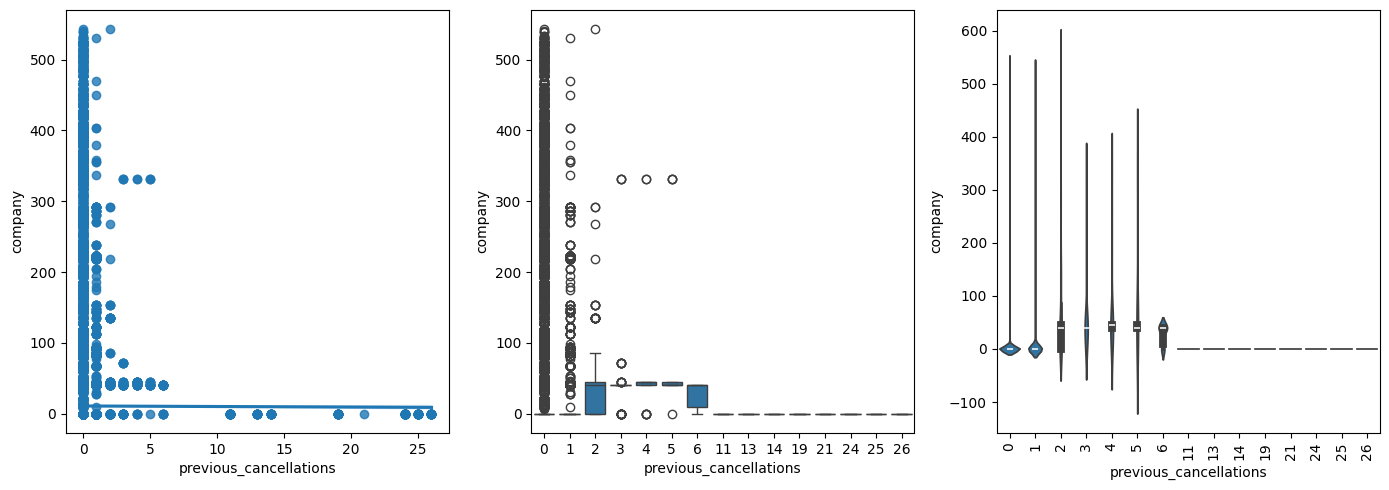

In [76]:
x = "previous_cancellations"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

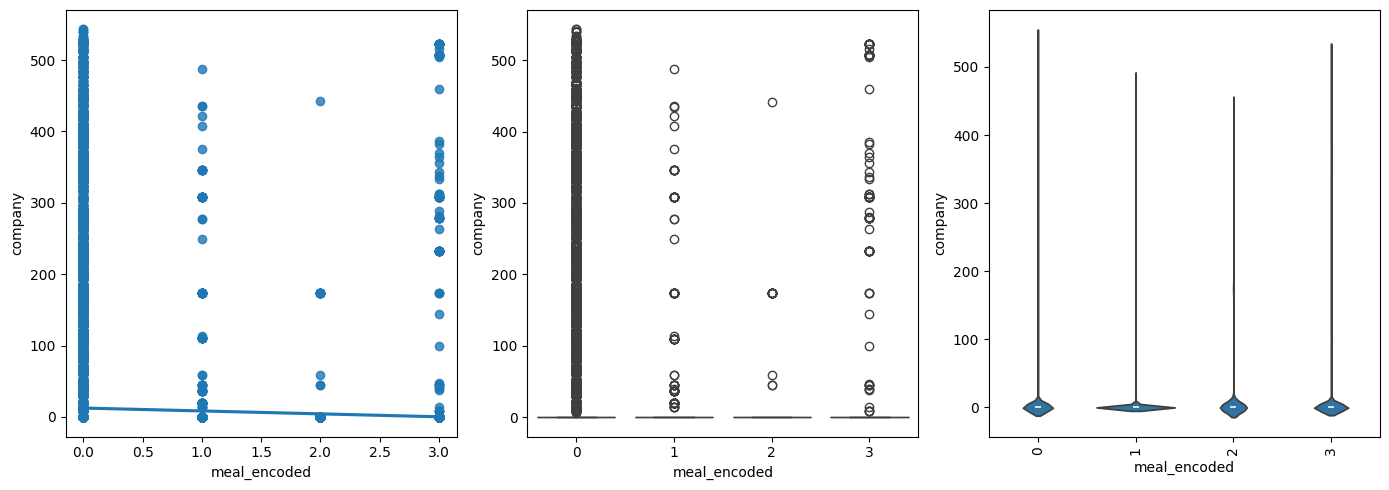

In [77]:
x = "meal_encoded"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

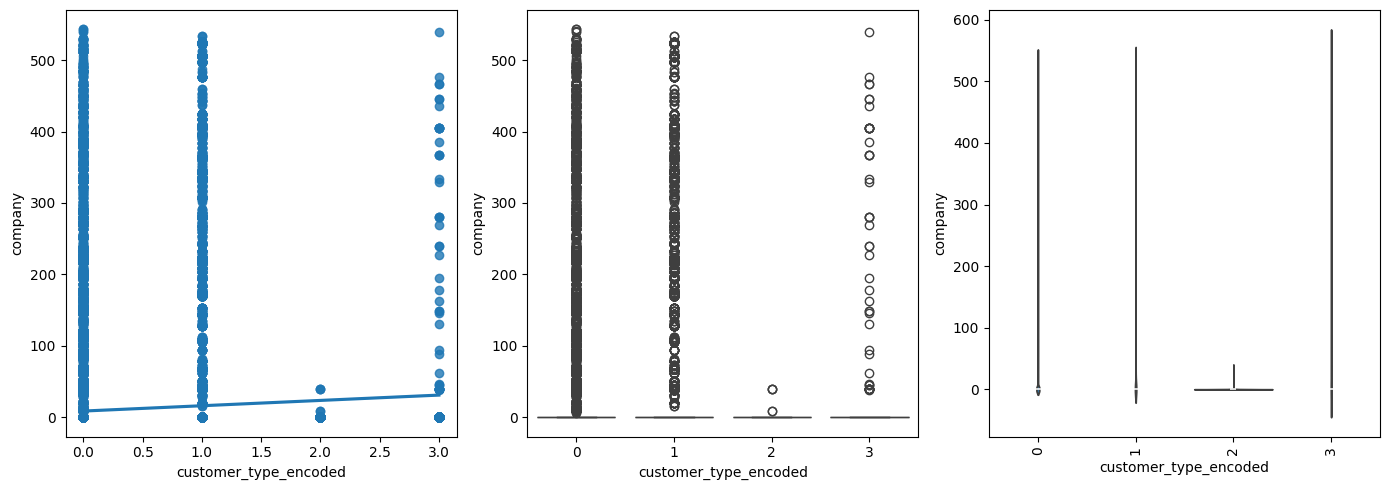

In [78]:
x = "customer_type_encoded"
y = "company"
plot_distributions(hotel_booking_num_df, x, y)

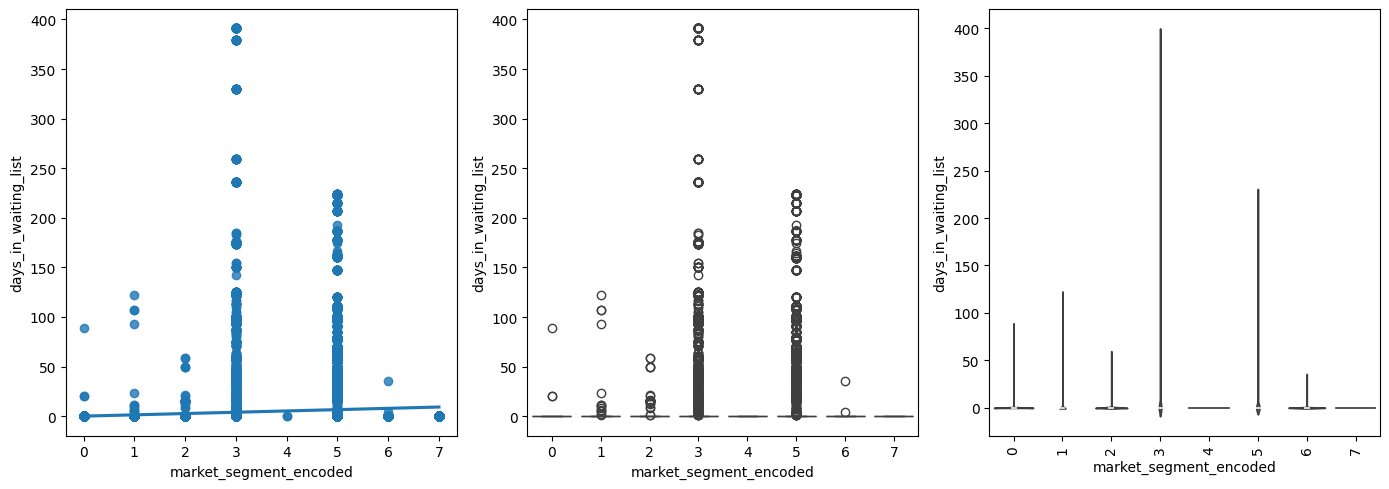

In [79]:
x = "market_segment_encoded"
y = "days_in_waiting_list"
plot_distributions(hotel_booking_num_df, x, y)

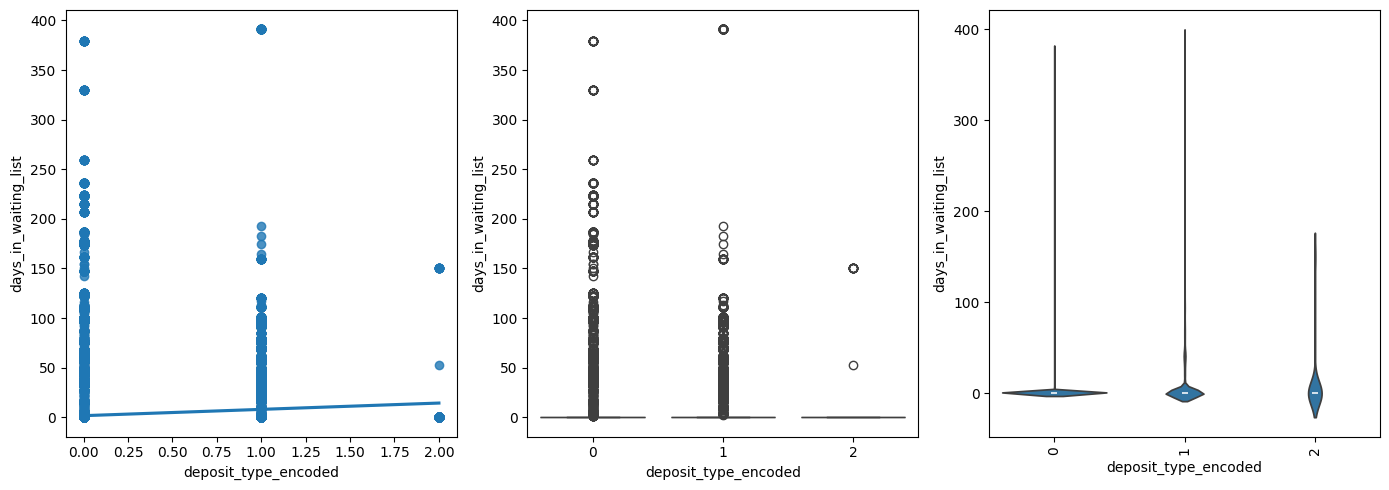

In [80]:
x = "deposit_type_encoded"
y = "days_in_waiting_list"
plot_distributions(hotel_booking_num_df, x, y)

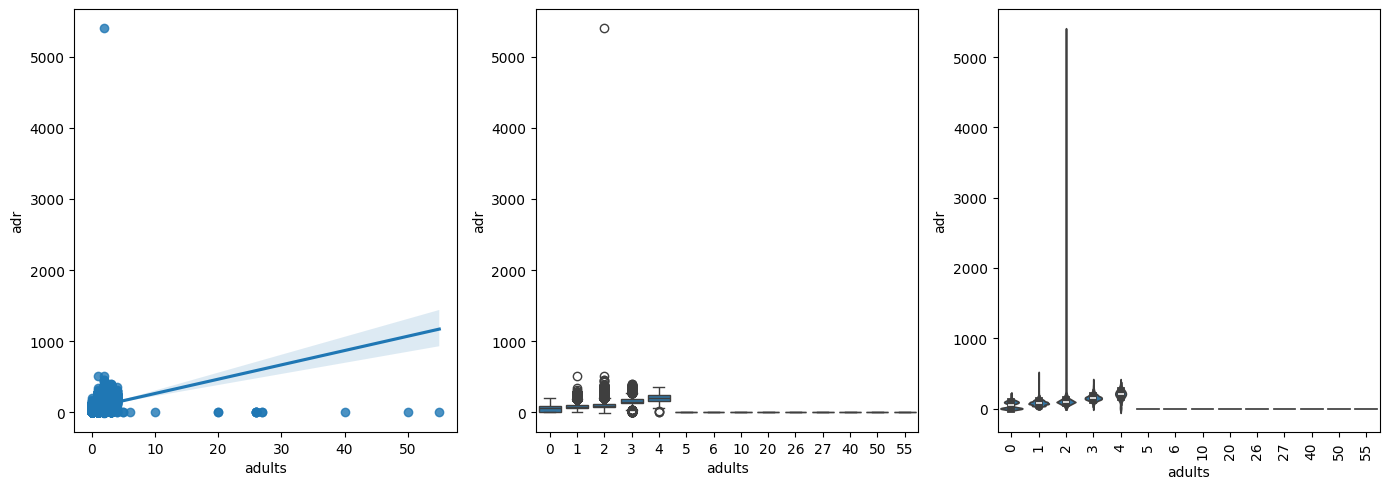

In [81]:
x = "adults"
y = "adr"
plot_distributions(hotel_booking_num_df, x, y)

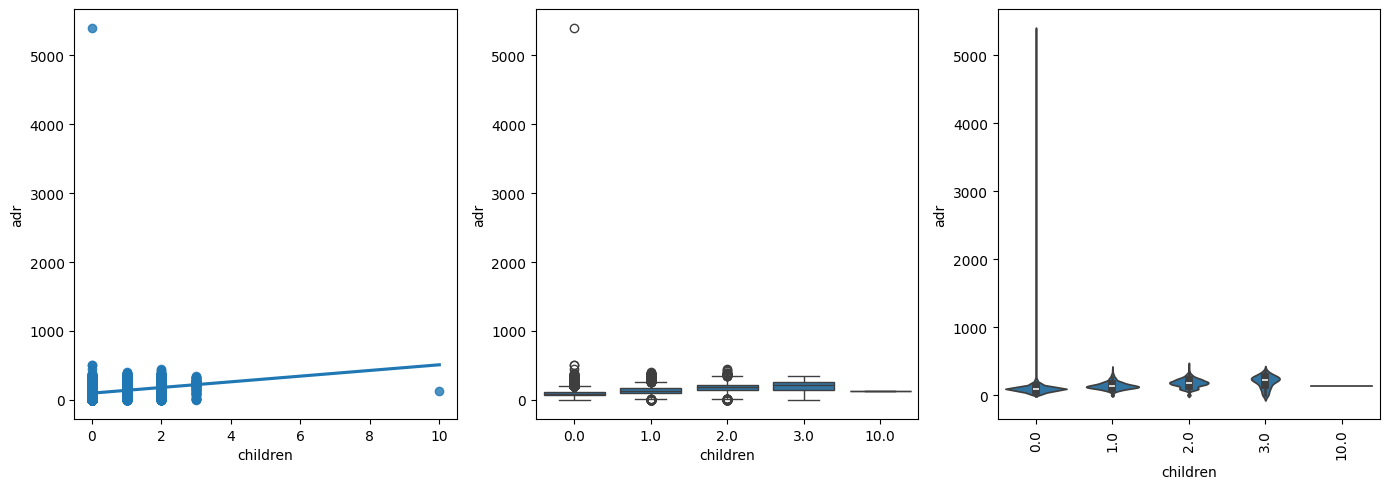

In [82]:
x = "children"
y = "adr"
plot_distributions(hotel_booking_num_df, x, y)

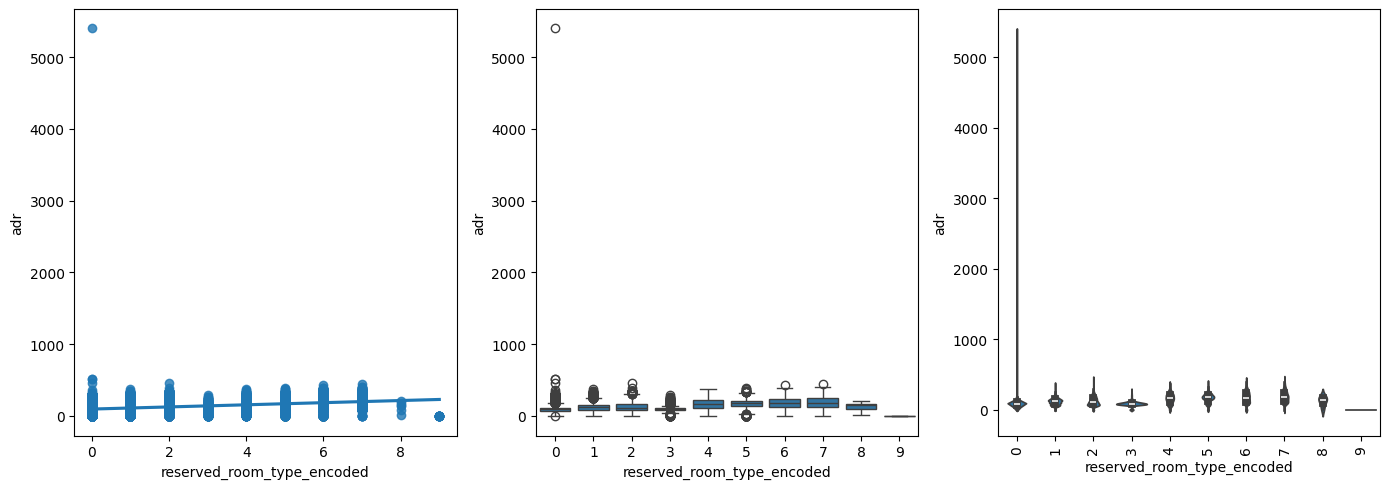

In [83]:
x = "reserved_room_type_encoded"
y = "adr"
plot_distributions(hotel_booking_num_df, x, y)

Creating training set and test set

In [84]:
#select features and labels
columns_to_drop = ['reservation_status_encoded', 'is_canceled', 'reservation_status_day', 'reservation_status_month', 'reservation_status_week', 'reservation_status_year', 'adr']
X = hotel_booking_num_df.loc[:, [column for column in hotel_booking_num_df.columns if column not in columns_to_drop]]
y = hotel_booking_num_df.loc[:, 'reservation_status_encoded']
# X.info()
# y.info()


In [85]:
#split data into training and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# display(X_train.head(2))
# display(y_train.head(2))
# display(X_test.head(2))
# display(y_test.head(2))

In [87]:
#create scaler
label_scaler = StandardScaler()

# Scale the features
X_train_scaled = label_scaler.fit_transform(X_train)
X_test_scaled = label_scaler.transform(X_test)

**Model Training and Evaluation**

In [88]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=200, random_state=42, C=0.1)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [89]:
#train model with decision tree:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.86


**Balancing of Labels**

To address imbalance across the labels **Checked out** vs **Cancelled** vs **No show** I will be applying the following techniques:

1. Class weights
2. Oversampling
3. Undersampling

Before applying this techniques the validation loss was actually very high compared to applying this technique.

In [90]:
# weight_balance = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_labels = np.unique(y_train)
# weight_balance = dict(zip(class_labels, weight_balance))

# random_undersampler = RandomUnderSampler(random_state=42)
# X_train_scaled_resampled, y_train_resampled = random_undersampler.fit_resample(X_train_scaled, y_train)


smote = RandomOverSampler(random_state=42)  # Or RandomOverSampler(random_state=42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [171]:
#train model with deep learning:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    # keras.layers.Dense(64, activation='relu'),

    # keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),  # Drops 40% of features

    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(3, activation='softmax')
])

In [172]:
#compile model softmax
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])

In [173]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [174]:
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[])
#
# history = model.fit(X_train_scaled_resampled, y_train_resampled, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7860 - loss: 0.6705 - val_accuracy: 0.8287 - val_loss: 0.4398
Epoch 2/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8276 - loss: 0.4386 - val_accuracy: 0.8351 - val_loss: 0.4143
Epoch 3/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8333 - loss: 0.4128 - val_accuracy: 0.8341 - val_loss: 0.4028
Epoch 4/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8326 - loss: 0.4061 - val_accuracy: 0.8397 - val_loss: 0.3970
Epoch 5/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8404 - loss: 0.3922 - val_accuracy: 0.8407 - val_loss: 0.3946
Epoch 6/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8406 - loss: 0.3899 - val_accuracy: 0.8390 - val_loss: 0.3951
Epoch 7/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8461 - loss: 0.3845 - val_accuracy: 0.8429 - val_loss: 0.3918
Epoch 8/200
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8454 - loss: 


Test Loss: 0.3758

Test Accuracy: 0.8613

Test Loss: 0.3944

Test Accuracy: 0.8614

Test Loss: 0.3604

Test Accuracy: 0.8612

Test Loss: 0.4388
Test Accuracy: 0.8347

0.005
Test Loss: 0.4536
Test Accuracy: 0.8158

0.0005

Test Loss: 0.4733

Test Accuracy: 0.8243

0.005

Test Loss: 0.3428

Test Accuracy: 0.8561


0.001

8569

l2(0.001)

Test Loss: 0.3534

Test Accuracy: 0.8591


l1(0.001)

Test Loss: 0.3656
Test Accuracy: 0.8626

In [114]:
# def scoreMetrics(y_true, y_pred):
#   accuracy = accuracy_score(y_true, y_pred)
#   precision = precision_score(y_true, y_pred, average='weighted')
#   recall = recall_score(y_true, y_pred, average='weighted')
#   return accuracy, precision, recall


special requests e.g
1. private air travel
2. car rentals